In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve,auc, accuracy_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
seed =123

from xgboost import XGBClassifier
import xgboost as xgb

import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

%matplotlib inline

#pd.set_option('display.max_columns', 100)

/Users/xinyaliu/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
trainset = pd.read_csv('/Users/xinyaliu/Desktop/master report/train.csv')
testset = pd.read_csv('/Users/xinyaliu/Desktop/master report/test.csv')

In [4]:
trainset.head()

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin       ...        \
0              0              0              1              0       ...         
1              0              0              0              1       ...         
2              0              0              0              1       ...         
3              0              1              0              0       ...         
4              0              1              0              0       ...         

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9           1           5           8               0   
1           3           1           1           9               0   
2           4           2           7           7               0   
3           2           2           4           9               0   
4           3           1           1           3               0   

   ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0               1               1               0               0   
1               1               1               0               1   
2               1               1               0               1   
3               0               0               0               0   
4               0               0               1               1   

   ps_calc_20_bin  
0               1  
1               0  
2               0  
3               0  
4               0  

[5 rows x 59 columns]

In [5]:
testset.head()

id  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0   0          0              1          8              1              0   
1   1          4              2          5              1              0   
2   2          5              1          3              0              0   
3   3          0              1          6              0              0   
4   4          5              1          7              0              0   

   ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin       ...        \
0              0              1              0              0       ...         
1              0              0              0              1       ...         
2              0              0              0              1       ...         
3              1              0              0              0       ...         
4              0              0              0              1       ...         

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           1           1           1          12               0   
1           2           0           3          10               0   
2           4           0           2           4               0   
3           5           1           0           5               1   
4           4           0           0           4               0   

   ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0               1               1               0               0   
1               0               1               1               0   
2               0               0               0               0   
3               0               1               0               0   
4               1               1               0               0   

   ps_calc_20_bin  
0               1  
1               1  
2               0  
3               0  
4               1  

[5 rows x 58 columns]

In [6]:
trainset.shape

(595212, 59)

In [7]:
testset.shape

(892816, 58)

We can make few observations based on the data description in the competition:

Few groups are defined and features that belongs to these groups include patterns in the name (ind, reg, car, calc). The ind indicates most probably individual, reg is probably registration, car is self-explanatory, calc suggests a calculated field;
The postfix bin is used for binary features;
The postfix cat to is used for categorical features;
Features without the bin or cat indications are real numbers (continous values) of integers (ordinal values from 0 to n);
A missing value is indicated by -1;
The value that is subject of prediction is in the 'target' column. This one indicates whether or not a claim was filed for that insured person;
id is a data input ordinal number.

In [18]:
# check if there are NA values included in the dataset
trainset.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [19]:
testset.isnull().sum()

id                0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0


In [89]:
# missing values included in the dataset: the number is approximately 1 million, large enough to be treated as 
# nontrivial
(trainset==-1).sum().sum()

846458

In [23]:
(trainset==-1).sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


In [90]:
(testset==-1).sum().sum()

1270295

In [24]:
(testset==-1).sum()

id                     0
ps_ind_01              0
ps_ind_02_cat        307
ps_ind_03              0
ps_ind_04_cat        145
ps_ind_05_cat       8710
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         161684
ps_car_01_cat        160
ps_car_02_cat          5
ps_car_03_cat     616911
ps_car_04_cat          0
ps_car_05_cat     400359
ps_car_06_cat          0
ps_car_07_cat      17331
ps_car_08_cat          0
ps_car_09_cat        877
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              1
ps_car_12              0
ps_car_13              0
ps_car_14          63805
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


In [4]:
features = list(trainset.columns)
features

['id',
 'target',
 'ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [5]:
features.remove('target')

In [6]:
features.remove('id')

In [7]:
features

['ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [8]:
# separate feature columns into different lists based on the number property: categorical, binary, and numerics
cat_feature = [x for x in features if x[-3:] == 'cat']
bin_feature = [x for x in features if x[-3:] == 'bin']
num_feature = [x for x in features if x[-3:] not in ['cat','bin']]

In [46]:
trainset_num = trainset[num_feature]
trainset_num.describe()

ps_ind_01      ps_ind_03      ps_ind_14      ps_ind_15  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        1.900378       4.423318       0.012451       7.299922   
std         1.983789       2.699902       0.127545       3.546042   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       2.000000       0.000000       5.000000   
50%         1.000000       4.000000       0.000000       7.000000   
75%         3.000000       6.000000       0.000000      10.000000   
max         7.000000      11.000000       4.000000      13.000000   

           ps_reg_01      ps_reg_02      ps_reg_03      ps_car_11  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.610991       0.439184       0.551102       2.346072   
std         0.287643       0.404264       0.793506       0.832548   
min         0.000000       0.000000      -1.000000      -1.000000   
25%         0.400000       0.200000       0.525000       2.000000   
50%         0.700000       0.300000       0.720677       3.000000   
75%         0.900000       0.600000       1.000000       3.000000   
max         0.900000       1.800000       4.037945       3.000000   

           ps_car_12      ps_car_13      ...           ps_calc_05  \
count  595212.000000  595212.000000      ...        595212.000000   
mean        0.379945       0.813265      ...             1.885886   
std         0.058327       0.224588      ...             1.134927   
min        -1.000000       0.250619      ...             0.000000   
25%         0.316228       0.670867      ...             1.000000   
50%         0.374166       0.765811      ...             2.000000   
75%         0.400000       0.906190      ...             3.000000   
max         1.264911       3.720626      ...             6.000000   

          ps_calc_06     ps_calc_07     ps_calc_08     ps_calc_09  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        7.689445       3.005823       9.225904       2.339034   
std         1.334312       1.414564       1.459672       1.246949   
min         0.000000       0.000000       2.000000       0.000000   
25%         7.000000       2.000000       8.000000       1.000000   
50%         8.000000       3.000000       9.000000       2.000000   
75%         9.000000       4.000000      10.000000       3.000000   
max        10.000000       9.000000      12.000000       7.000000   

          ps_calc_10     ps_calc_11     ps_calc_12     ps_calc_13  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        8.433590       5.441382       1.441918       2.872288   
std         2.904597       2.332871       1.202963       1.694887   
min         0.000000       0.000000       0.000000       0.000000   
25%         6.000000       4.000000       1.000000       2.000000   
50%         8.000000       5.000000       1.000000       3.000000   
75%        10.000000       7.000000       2.000000       4.000000   
max        25.000000      19.000000      10.000000      13.000000   

          ps_calc_14  
count  595212.000000  
mean        7.539026  
std         2.746652  
min         0.000000  
25%         6.000000  
50%         7.000000  
75%         9.000000  
max        23.000000  

[8 rows x 26 columns]

In [10]:
trainset_cat = trainset[cat_feature]

In [11]:
for column in trainset_cat:
    print (trainset_cat[column].value_counts())

 1    431859
 2    123573
 3     28186
 4     11378
-1       216
Name: ps_ind_02_cat, dtype: int64
 0    346965
 1    248164
-1        83
Name: ps_ind_04_cat, dtype: int64
 0    528009
 6     20662
 4     18344
 1      8322
 3      8233
-1      5809
 2      4184
 5      1649
Name: ps_ind_05_cat, dtype: int64
 11    207573
 7     179247
 6      62393
 10     50087
 4      26174
 9      20323
 5      18142
 8      15093
 3       6658
 0       5904
 2       2144
 1       1367
-1        107
Name: ps_car_01_cat, dtype: int64
 1    493990
 0    101217
-1         5
Name: ps_car_02_cat, dtype: int64
-1    411231
 1    110709
 0     73272
Name: ps_car_03_cat, dtype: int64
0    496581
1     32115
2     23770
8     20598
9     19034
6      1560
3       640
5       545
4       230
7       139
Name: ps_car_04_cat, dtype: int64
-1    266551
 1    172667
 0    155994
Name: ps_car_05_cat, dtype: int64
11    131527
1     118386
0     110420
14     59253
10     33466
4      31136
15     21732
6      209

In [12]:
# encodes 'target' variable to show if a claim has been filed or not
trainset['target_name'] = trainset['target'].map({0:'not filed', 1:'filed'})

In [13]:
trainset.head()

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin     ...       \
0              0              0              1              0     ...        
1              0              0              0              1     ...        
2              0              0              0              1     ...        
3              0              1              0              0     ...        
4              0              1              0              0     ...        

   ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  ps_calc_16_bin  \
0           1           5           8               0               1   
1           1           1           9               0               1   
2           2           7           7               0               1   
3           2           4           9               0               0   
4           1           1           3               0               0   

   ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  ps_calc_20_bin  target_name  
0               1               0               0               1    not filed  
1               1               0               1               0    not filed  
2               1               0               1               0    not filed  
3               0               0               0               0    not filed  
4               0               1               1               0    not filed  

[5 rows x 60 columns]

In [14]:
trainset['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

/Users/xinyaliu/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


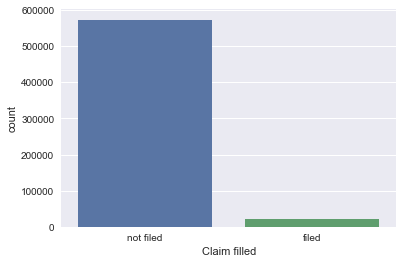

In [15]:
# show the basic information (distribution) of target
# imbalanced target
sns.set(style="darkgrid")
sns.countplot(x='target_name', data=trainset)
plt.xlabel('Claim filled')
plt.savefig('/Users/xinyaliu/Desktop/python_plot/Figure1.png')
plt.show()

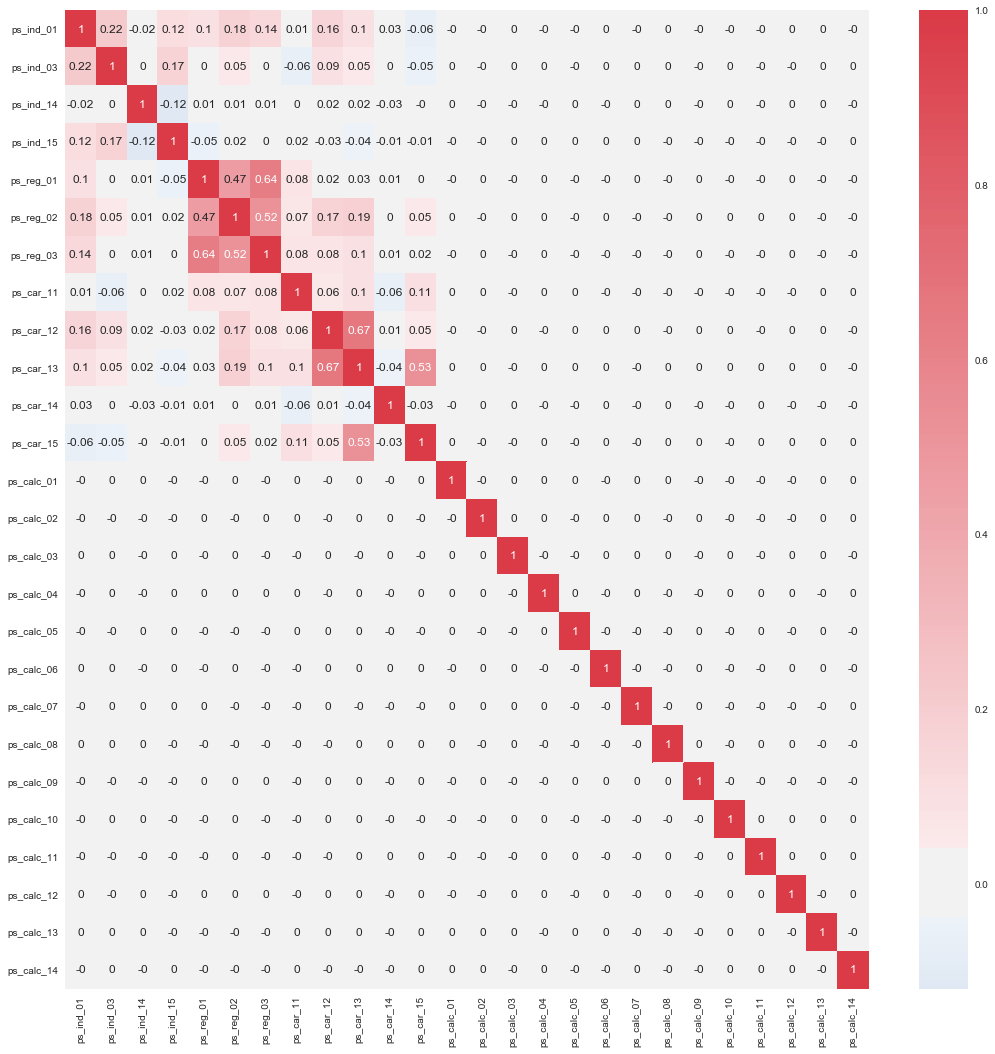

In [16]:
# Get correlation between numeric features 
# Plot correlation matrix heatmap
cor_matrix = trainset[num_feature].corr().round(2)
fig = plt.figure(figsize=(18,18))
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111))
plt.savefig('/Users/xinyaliu/Desktop/python_plot/correlation.png')
plt.show()

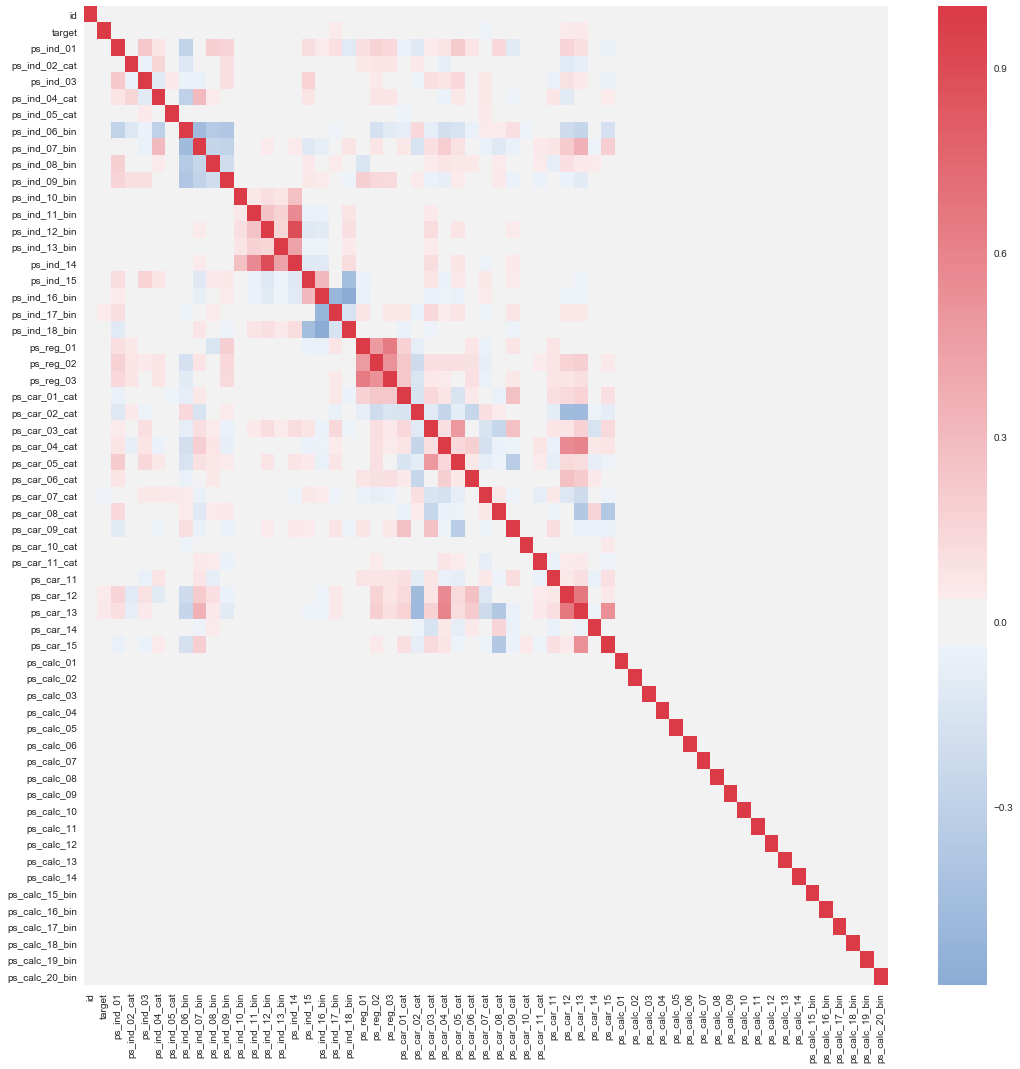

In [17]:
# ps_calc_* has no correlation with other variables
cor_matrix_full = trainset.corr().round(2)
fig = plt.figure(figsize=(18,18))
sns.heatmap(cor_matrix_full, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111))
#plt.show()
plt.savefig('/Users/xinyaliu/Desktop/python_plot/correlation_full.png')

/Users/xinyaliu/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/xinyaliu/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/xinyaliu/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/Users/xinyaliu/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureW

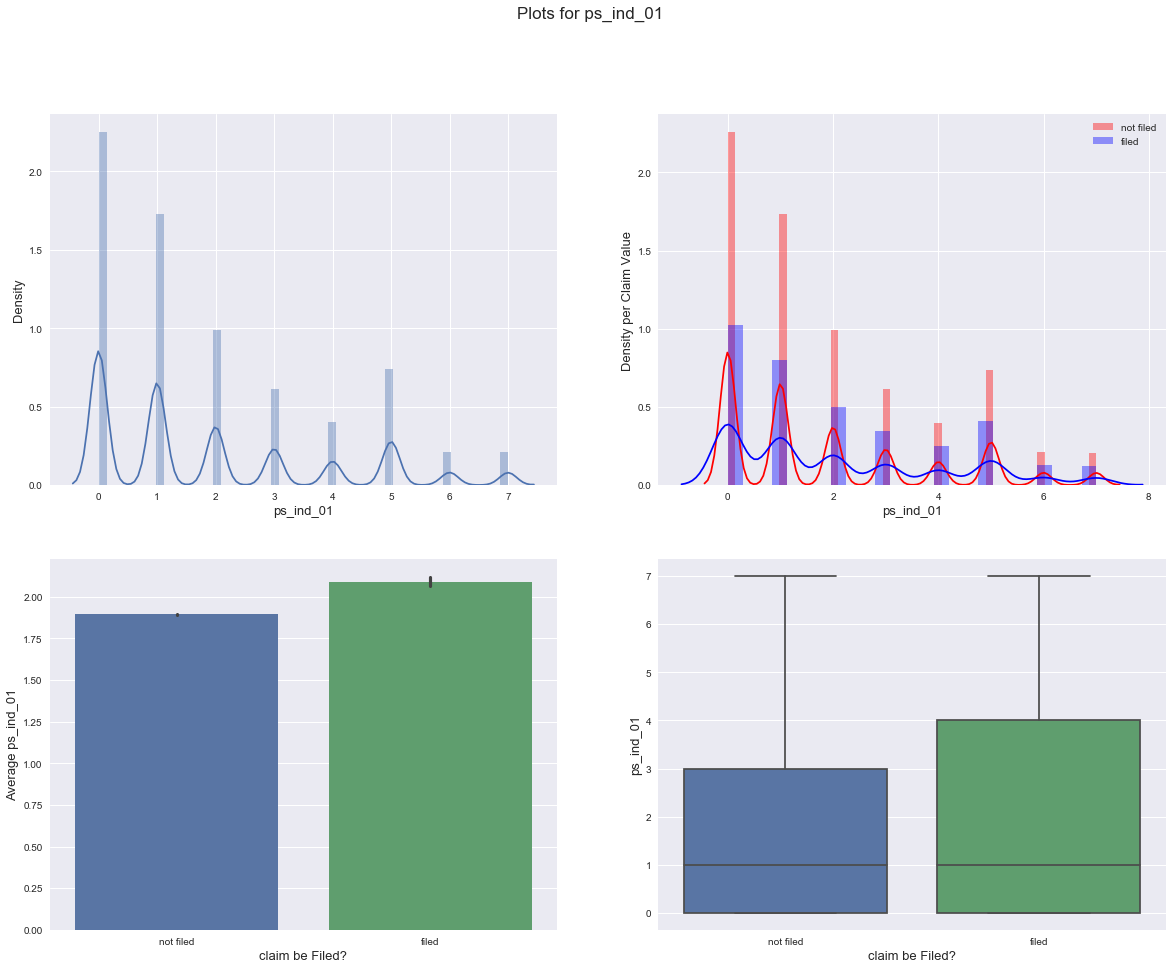

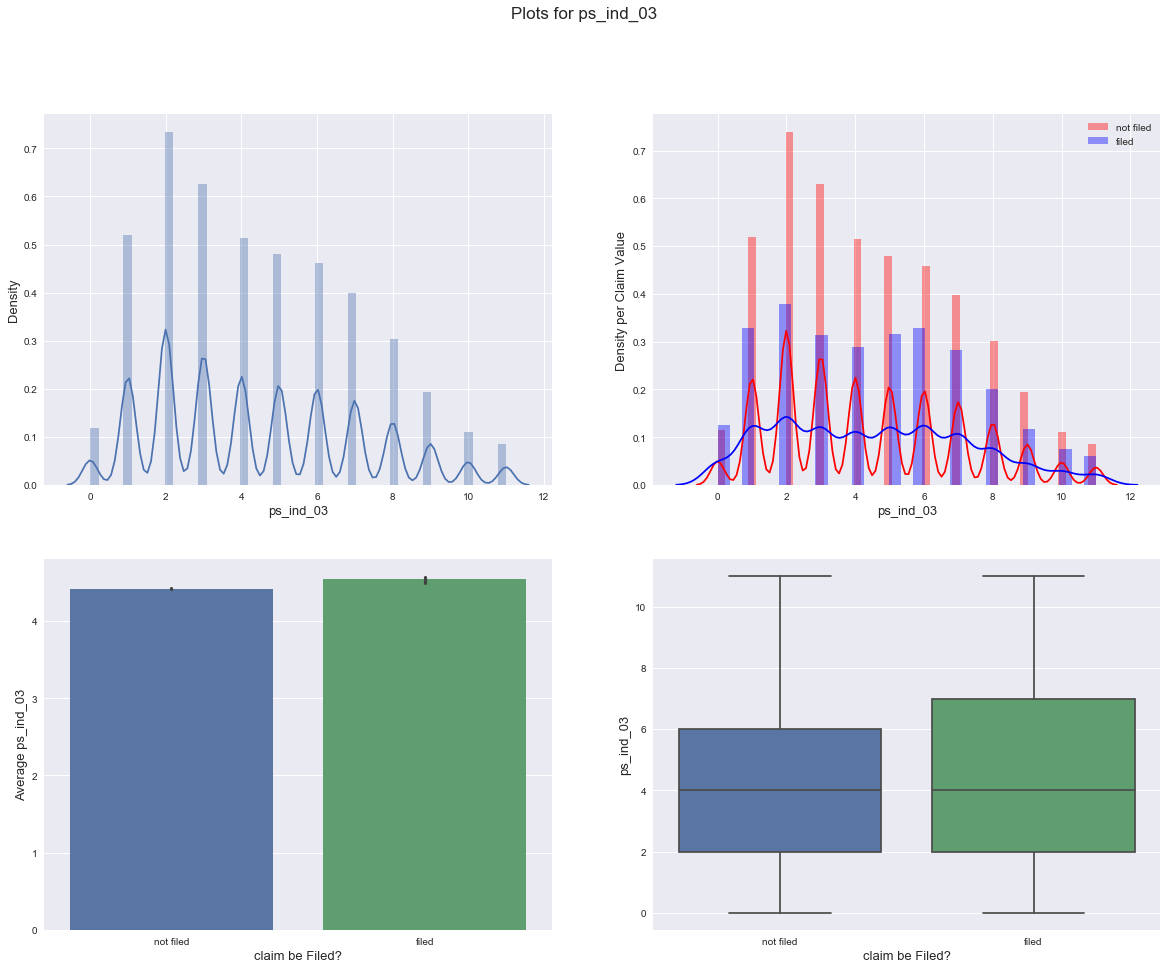

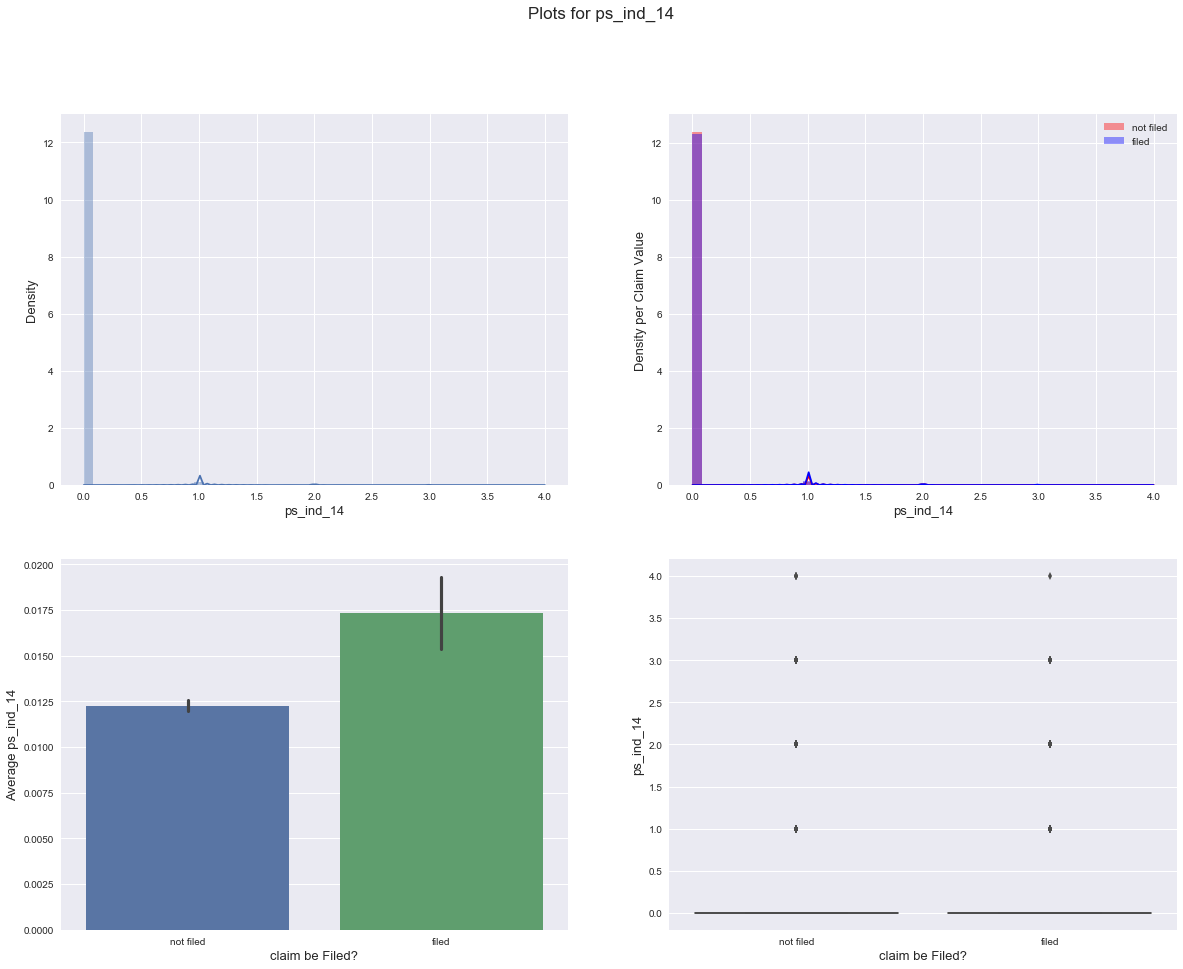

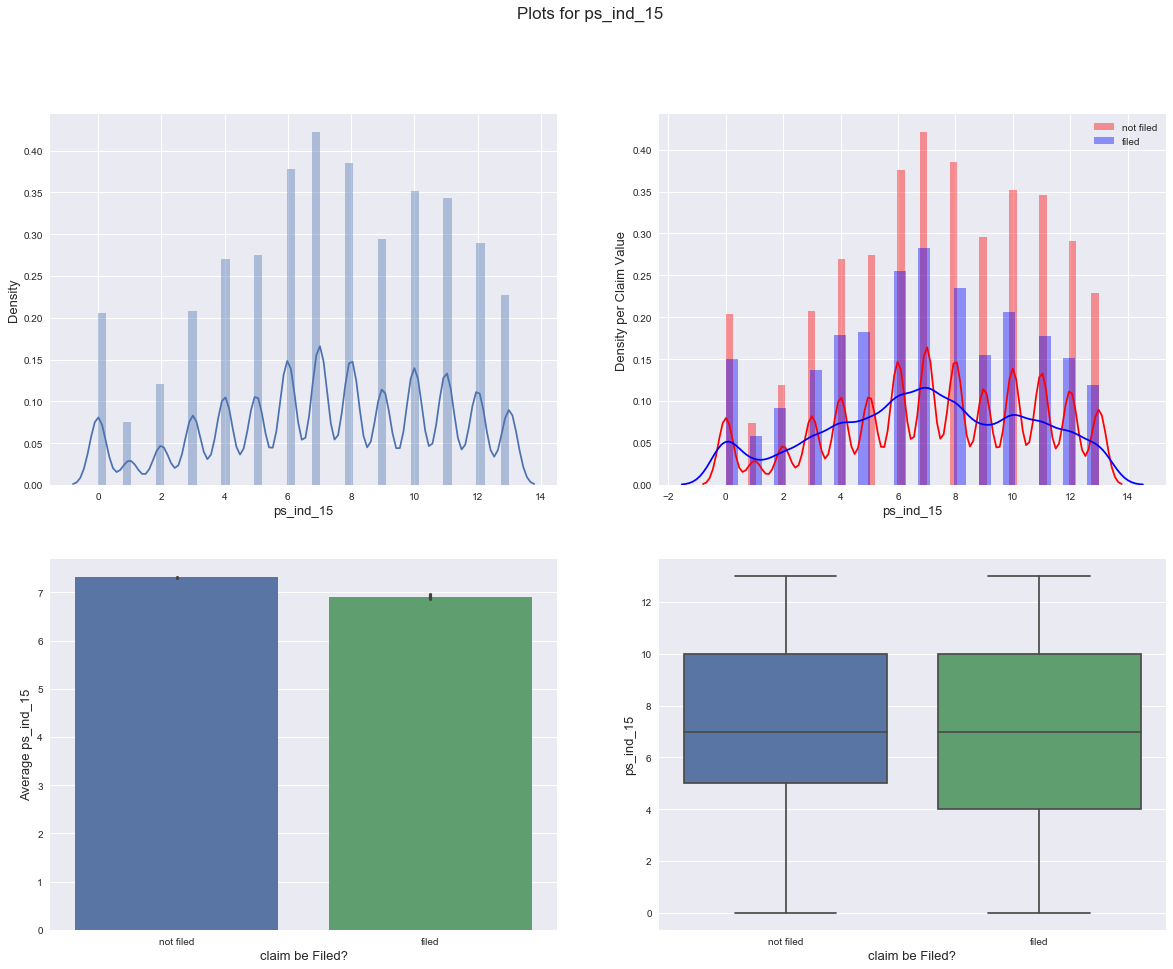

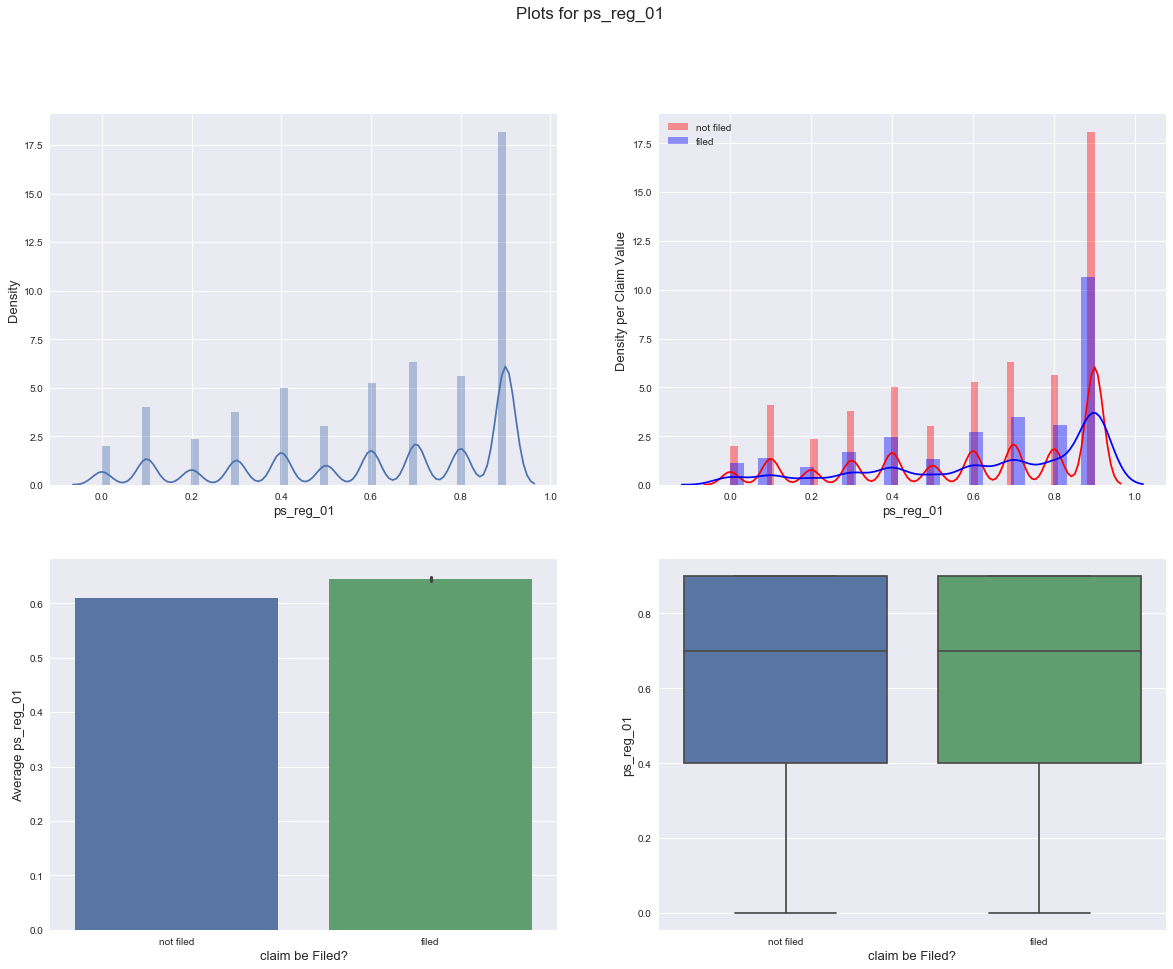

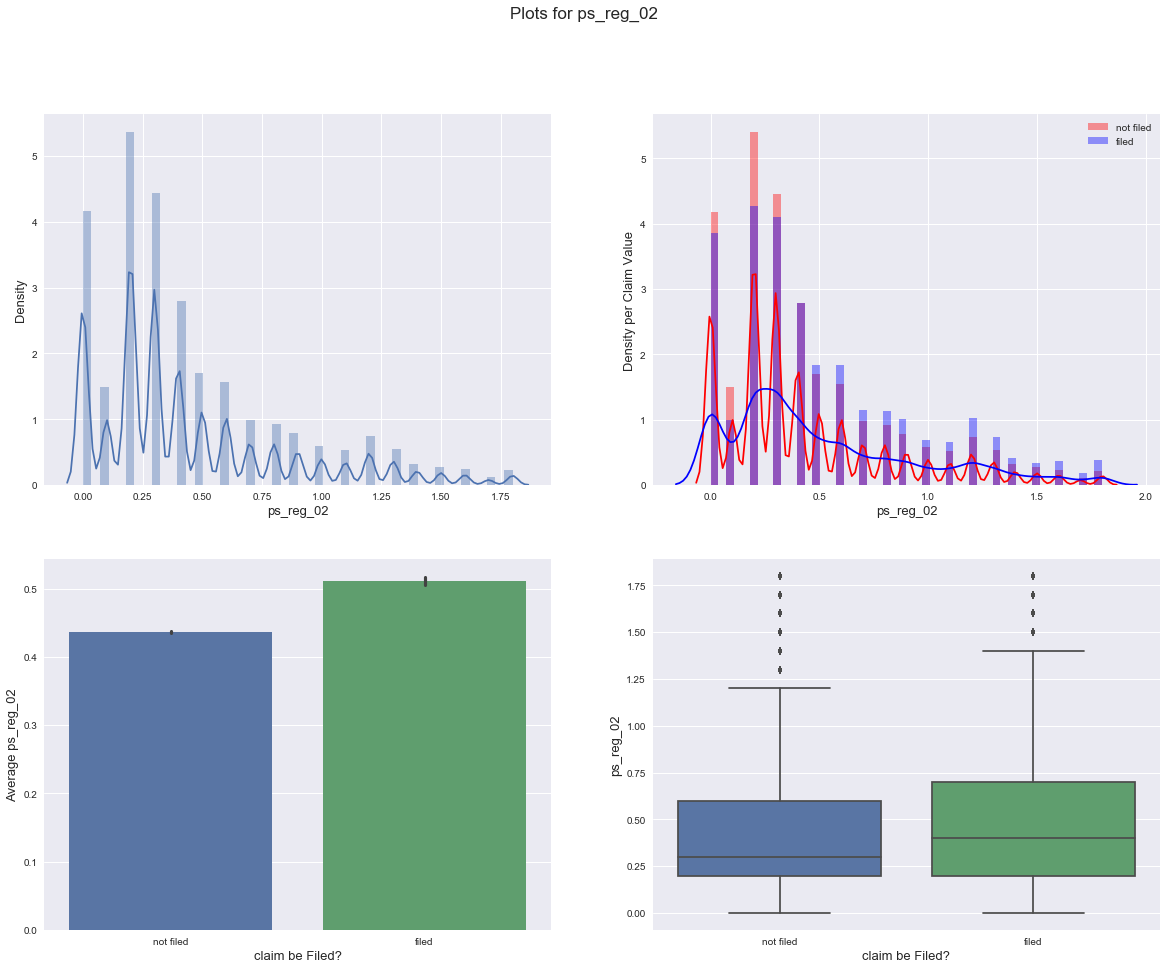

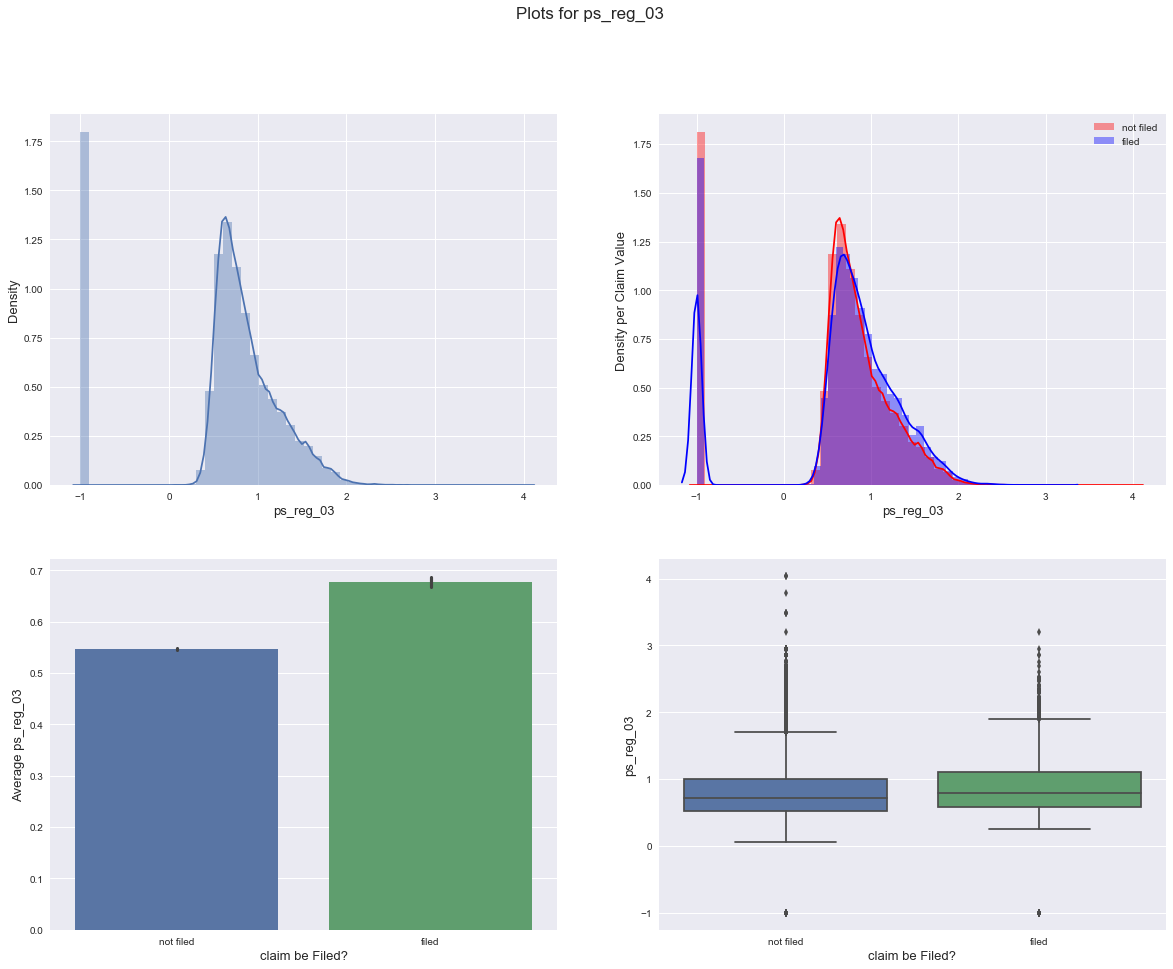

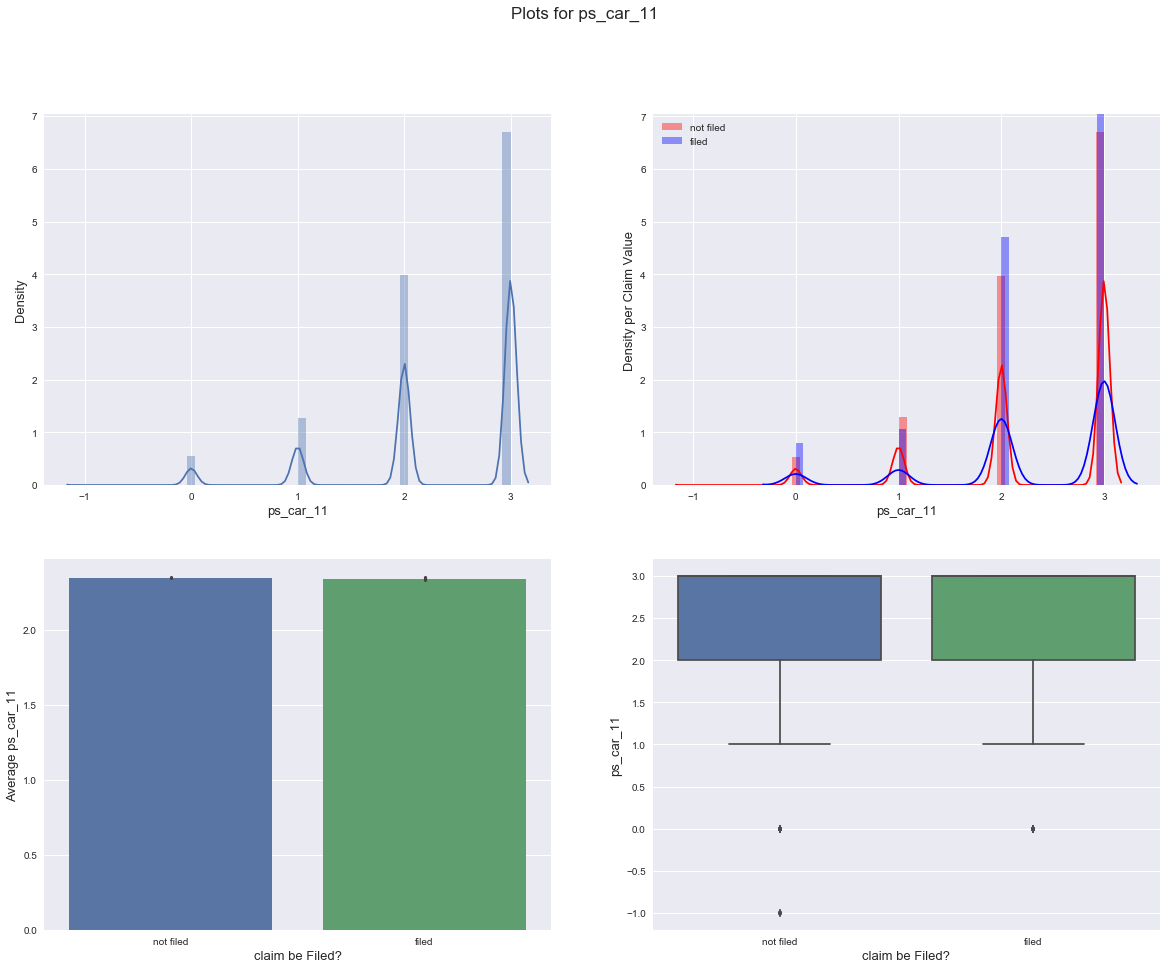

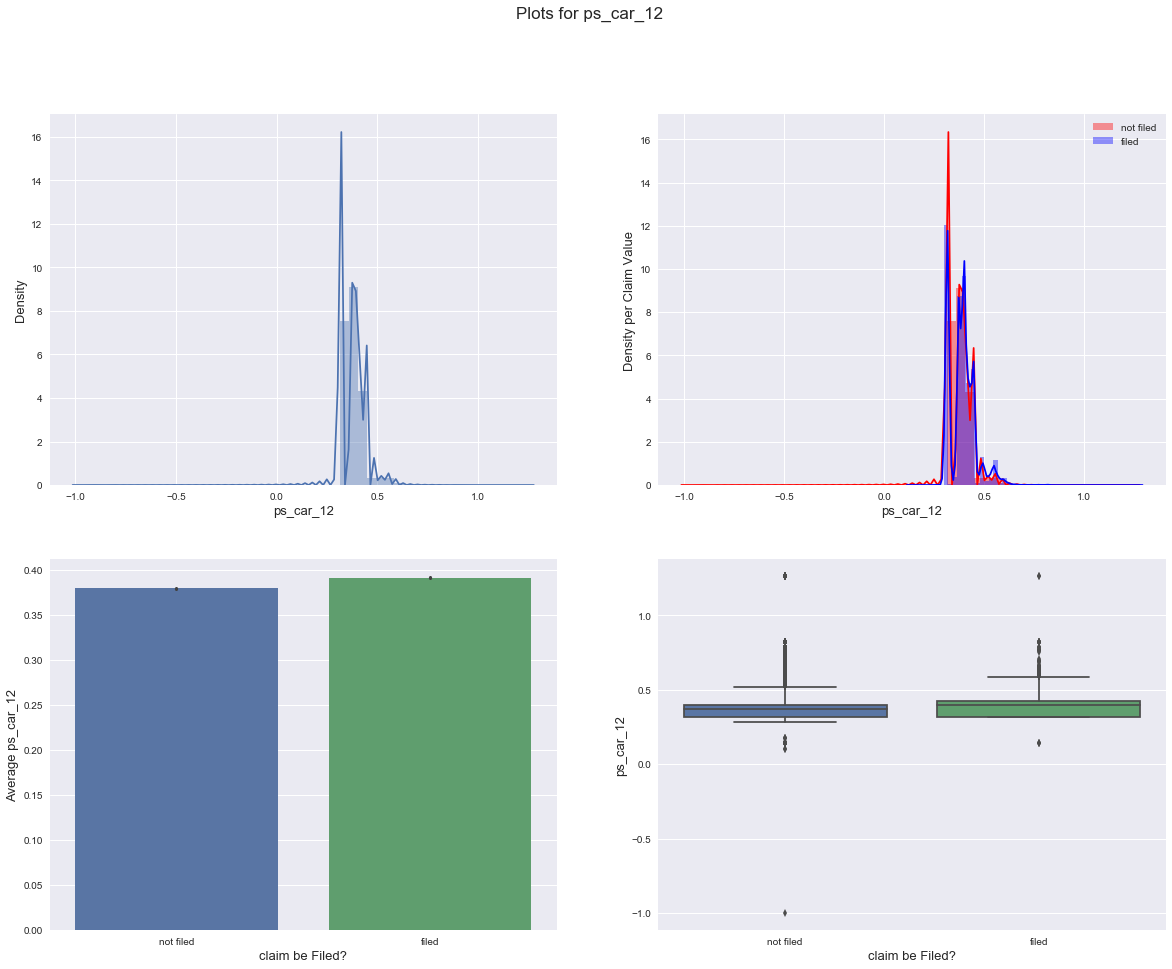

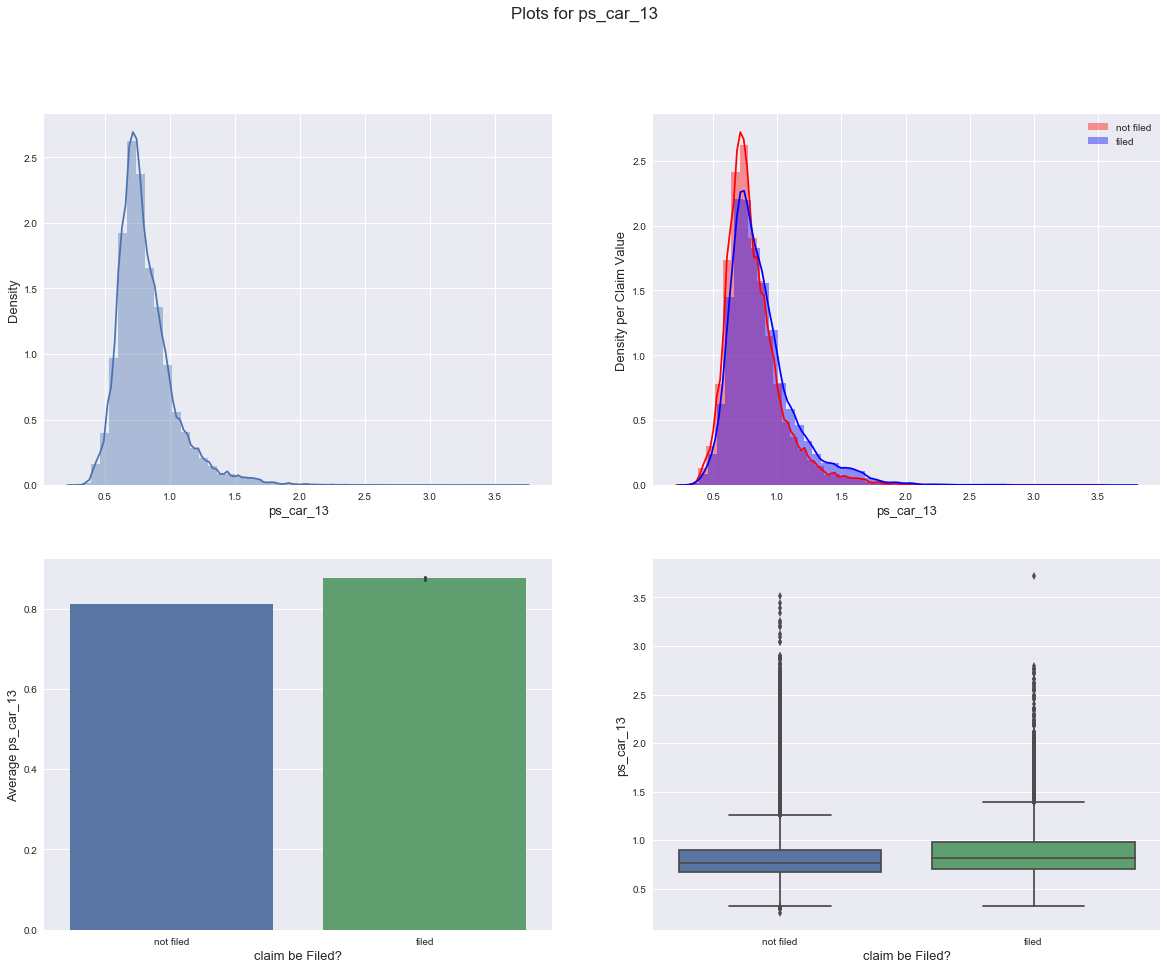

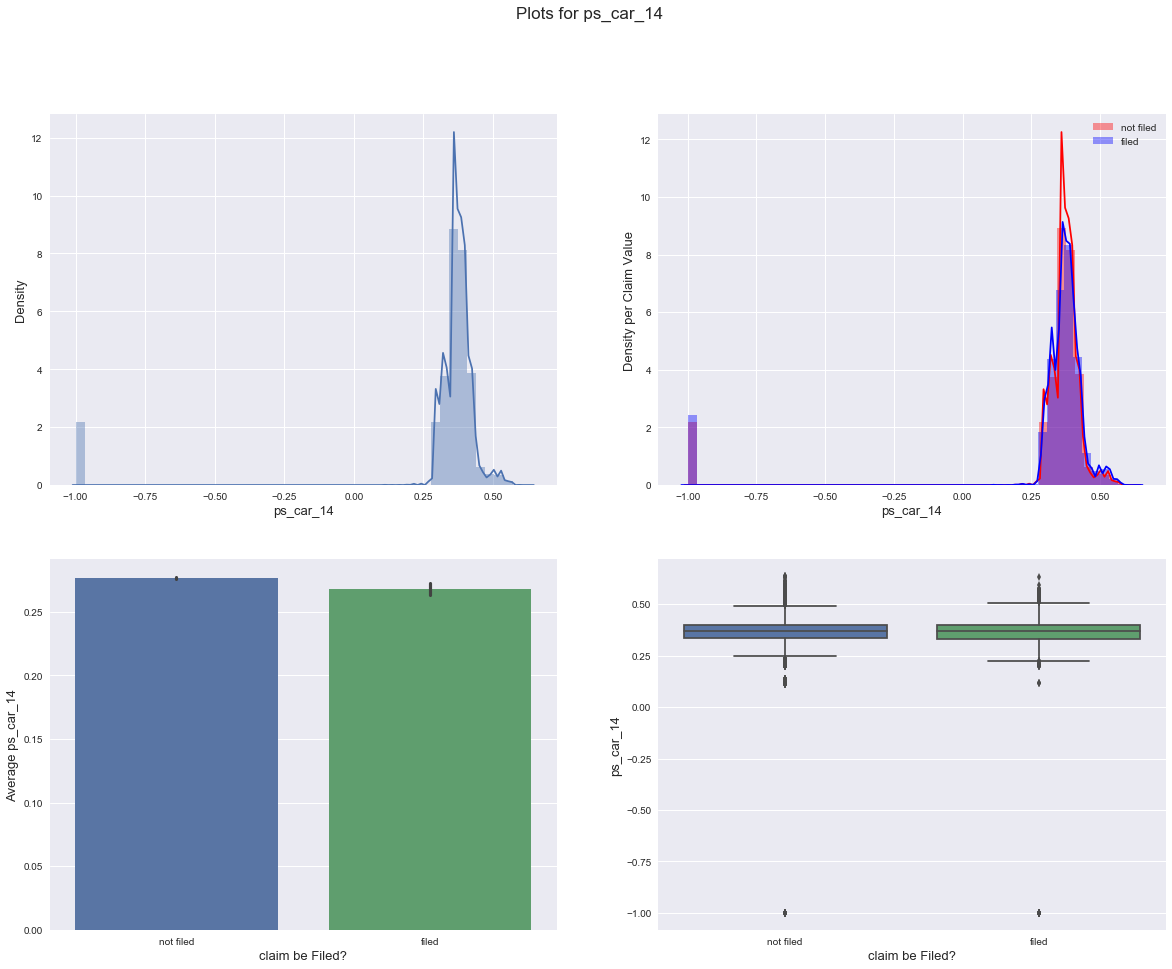

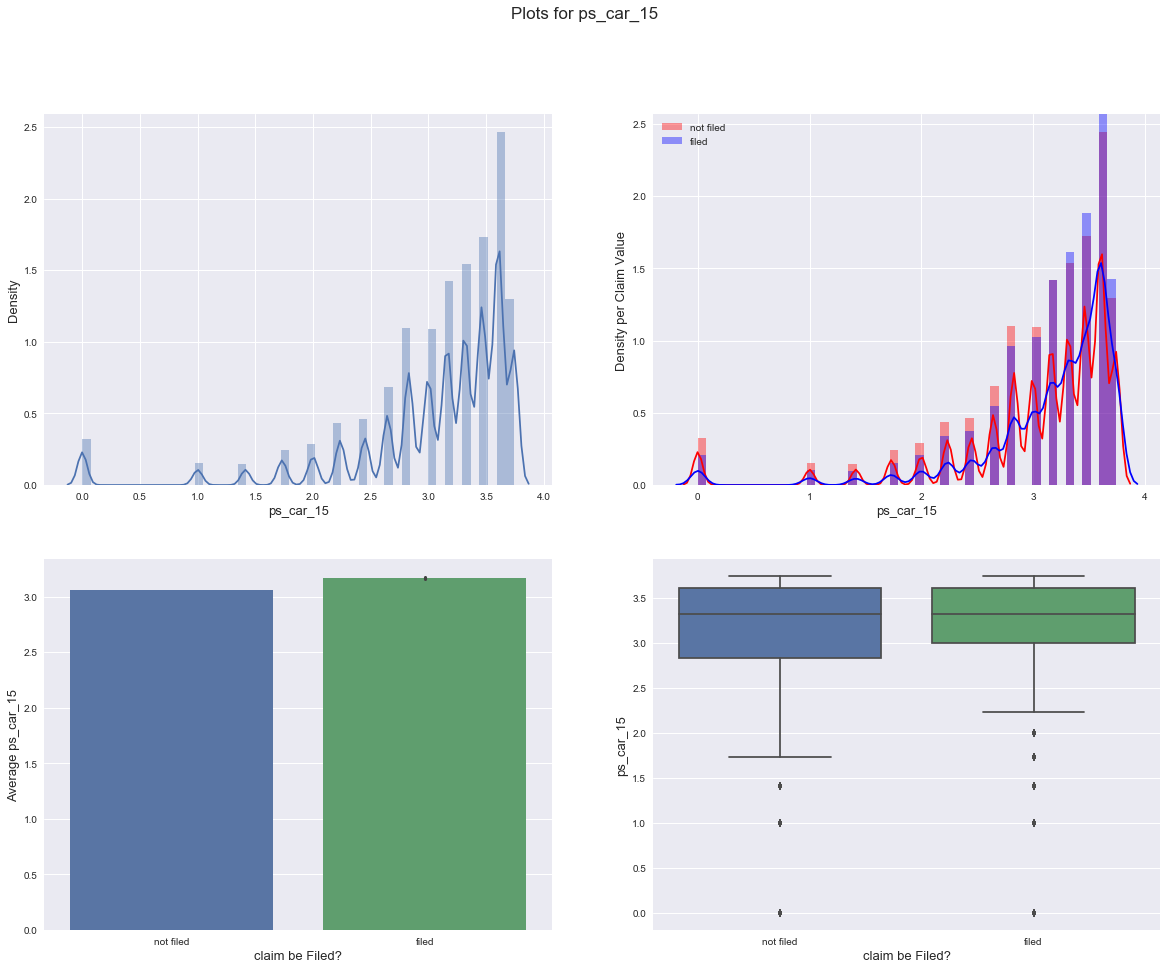

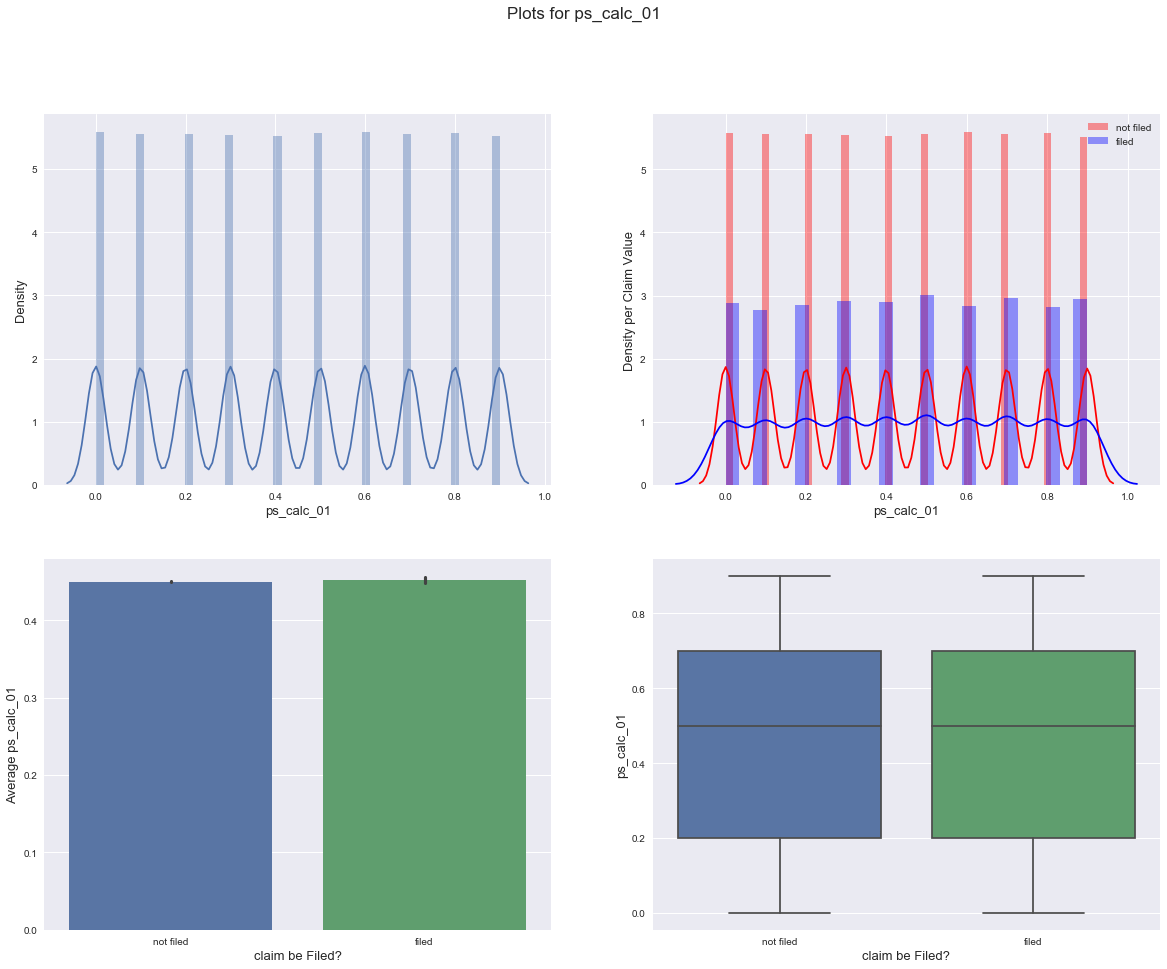

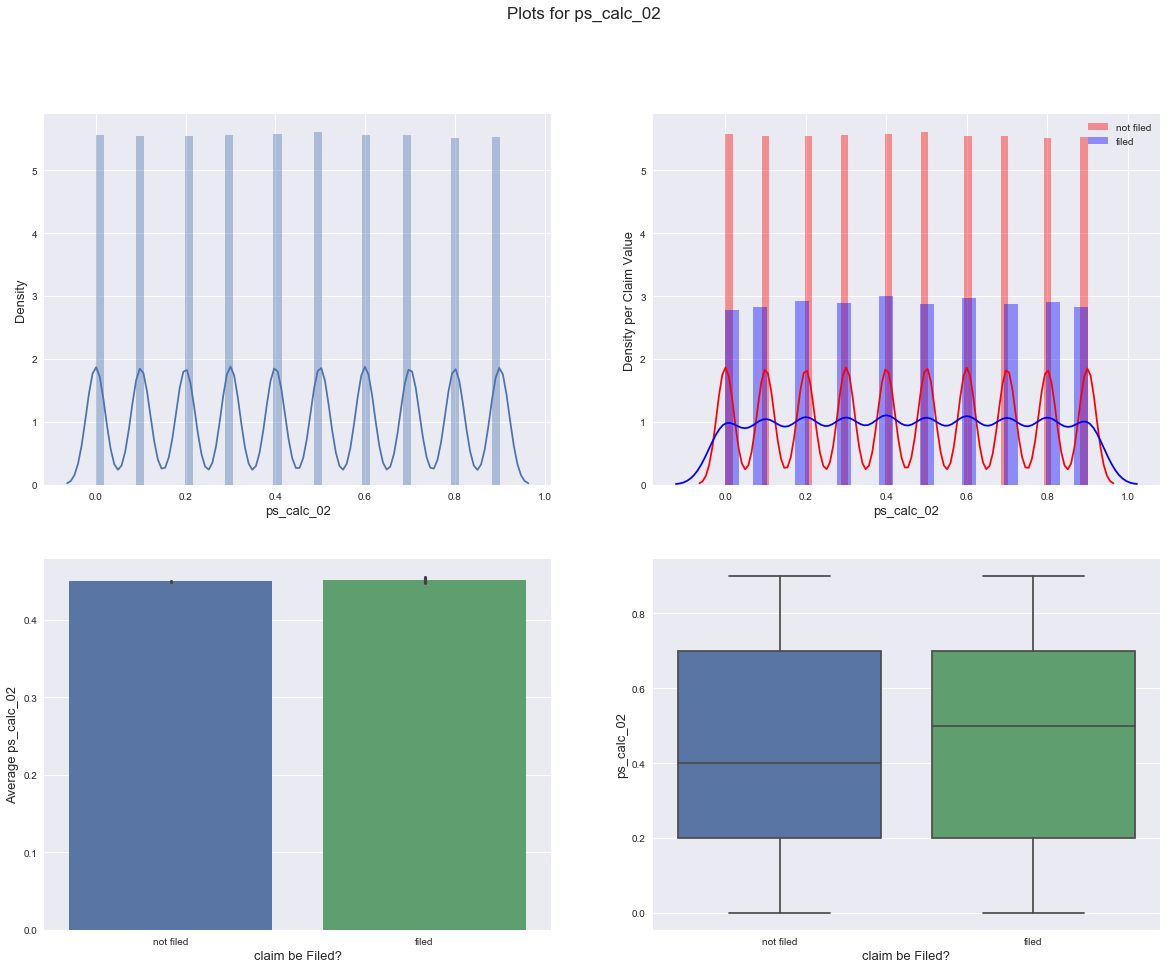

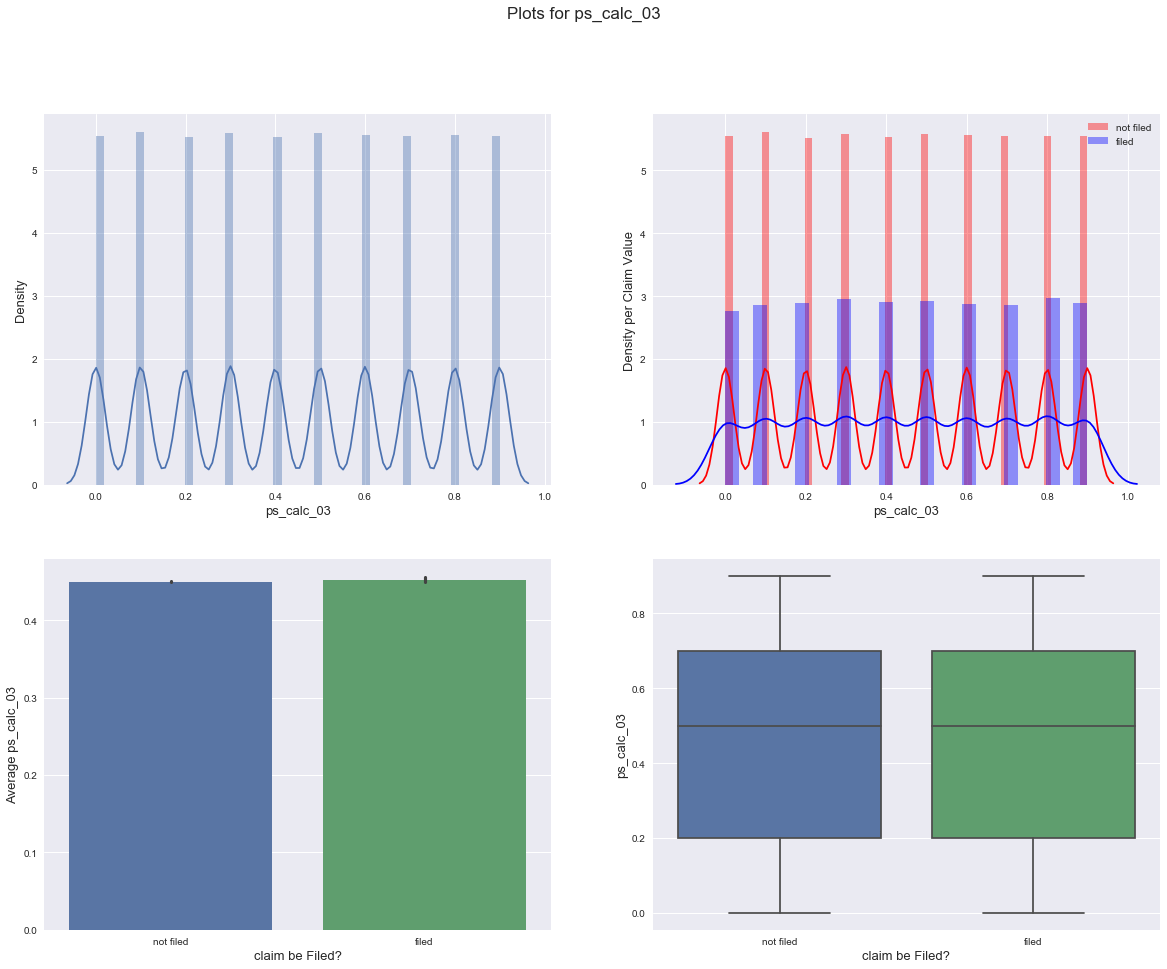

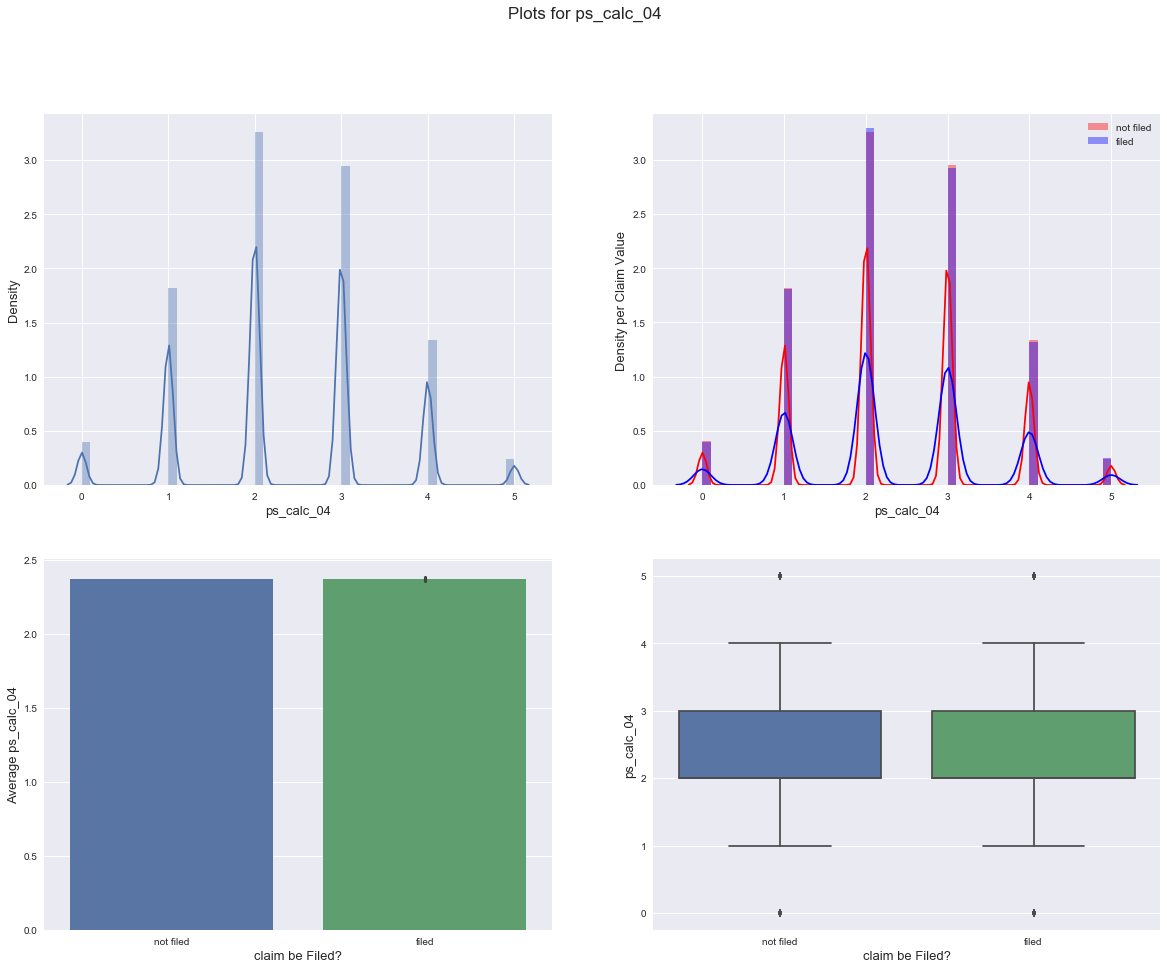

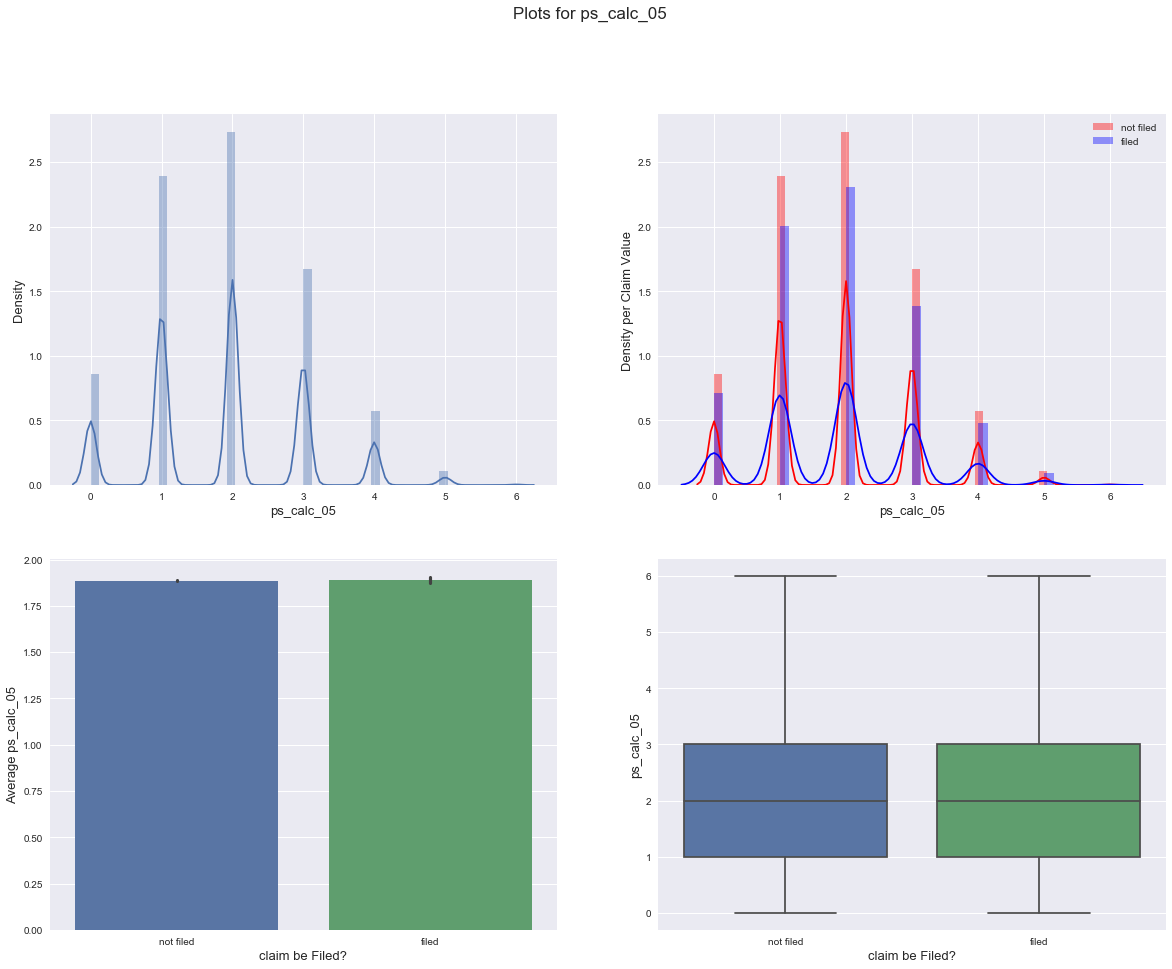

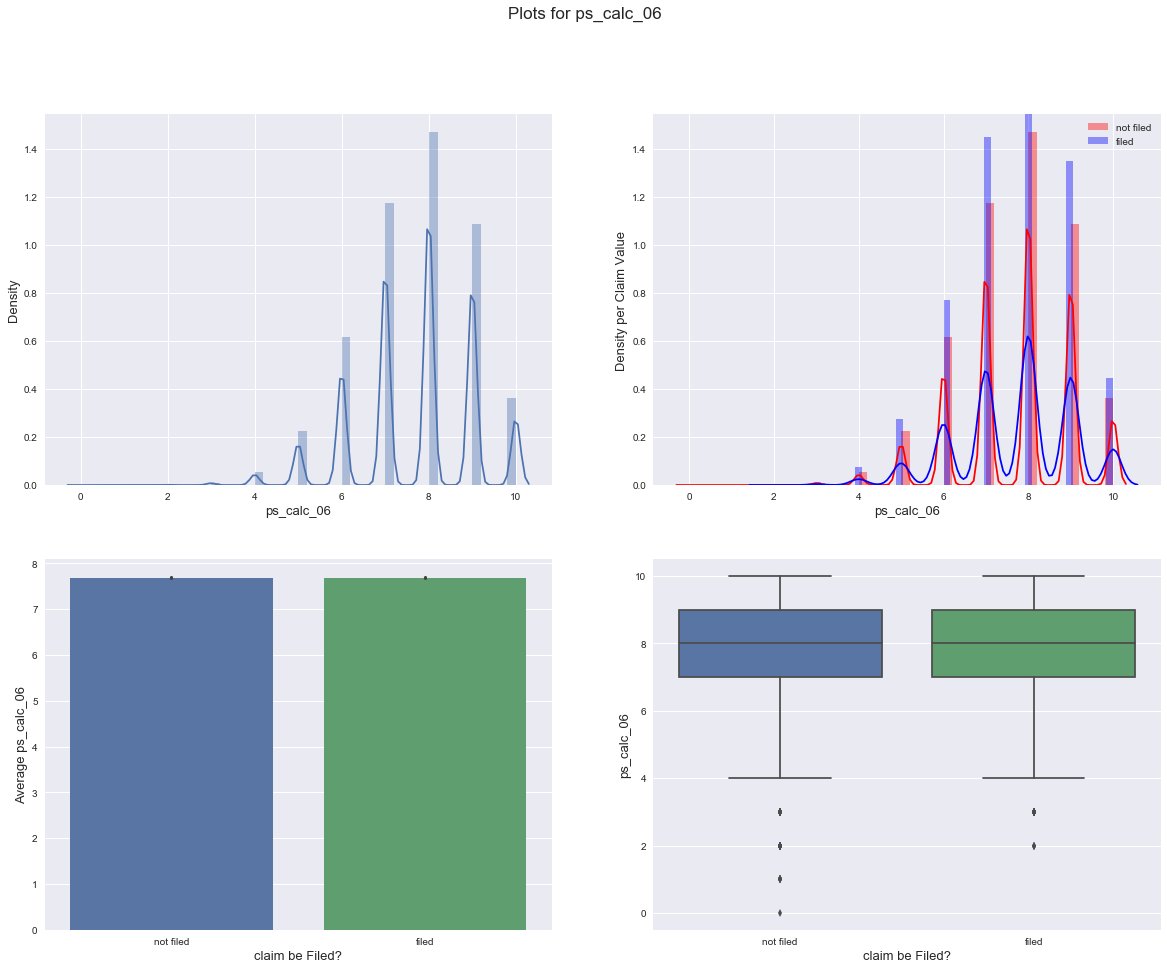

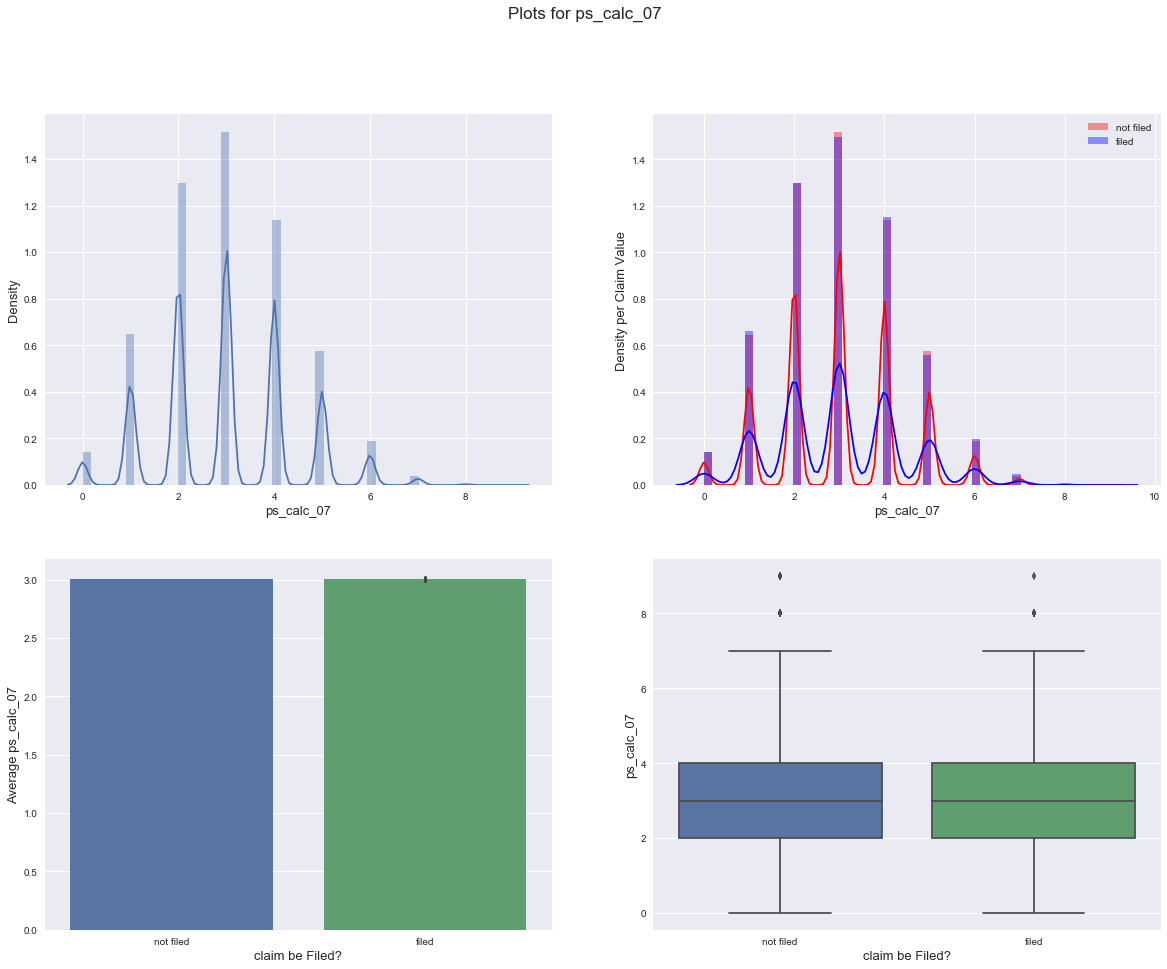

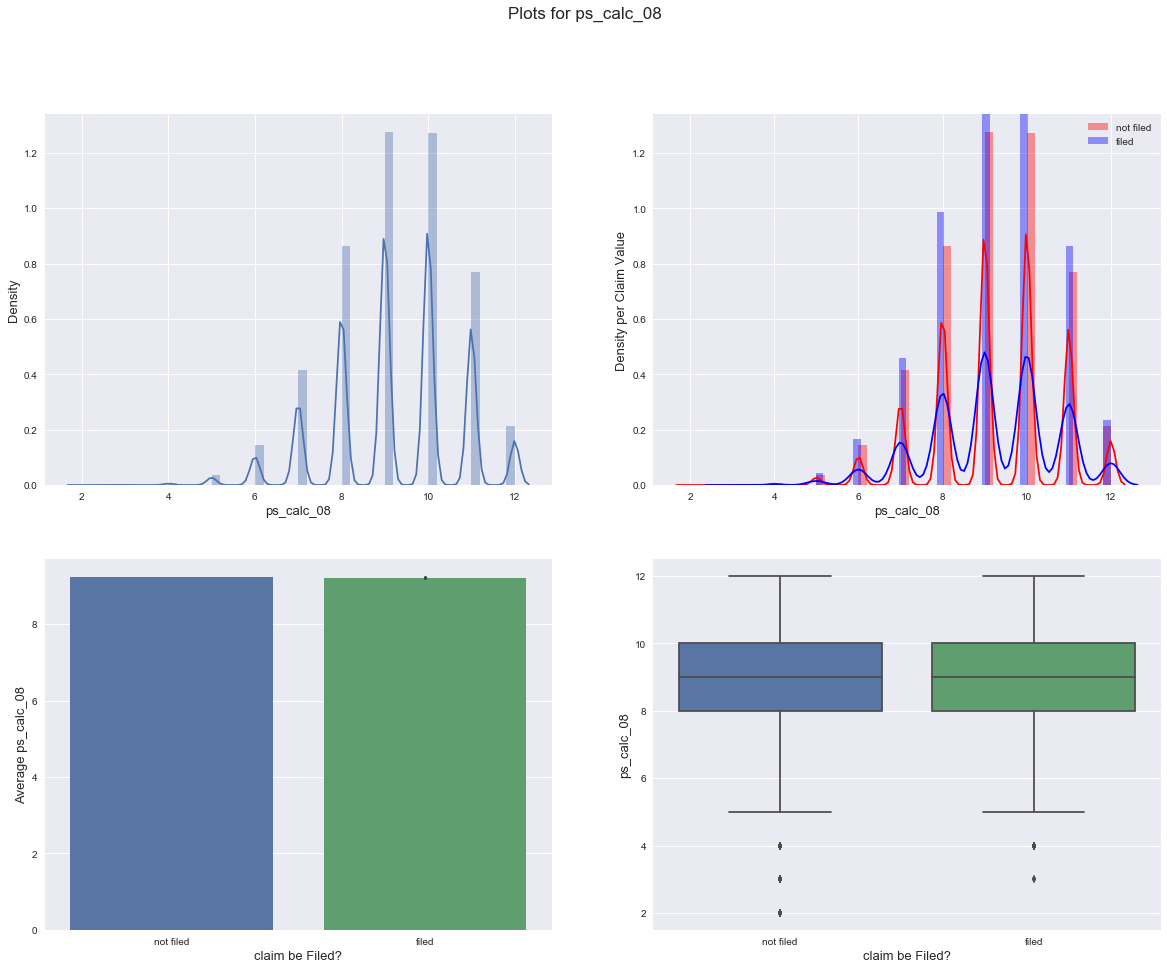

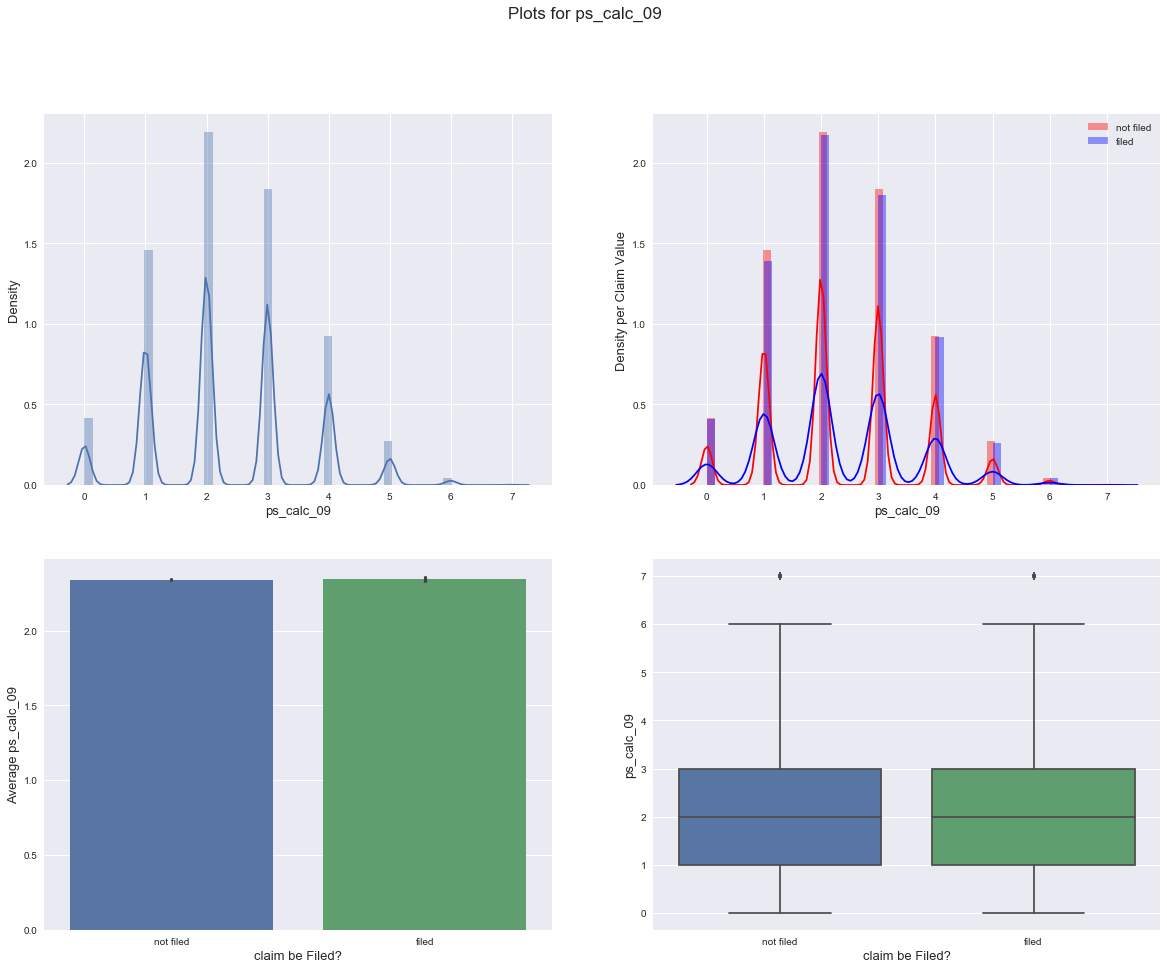

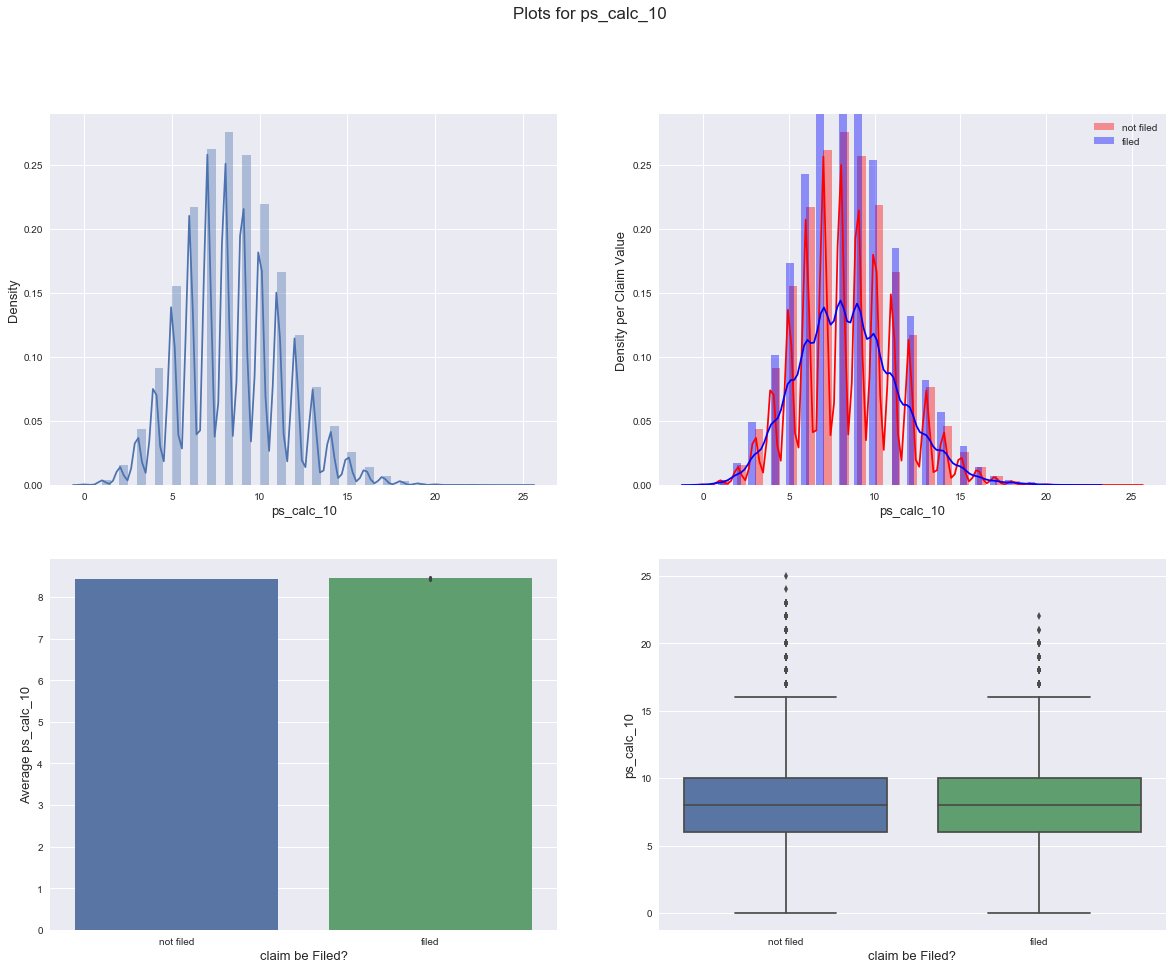

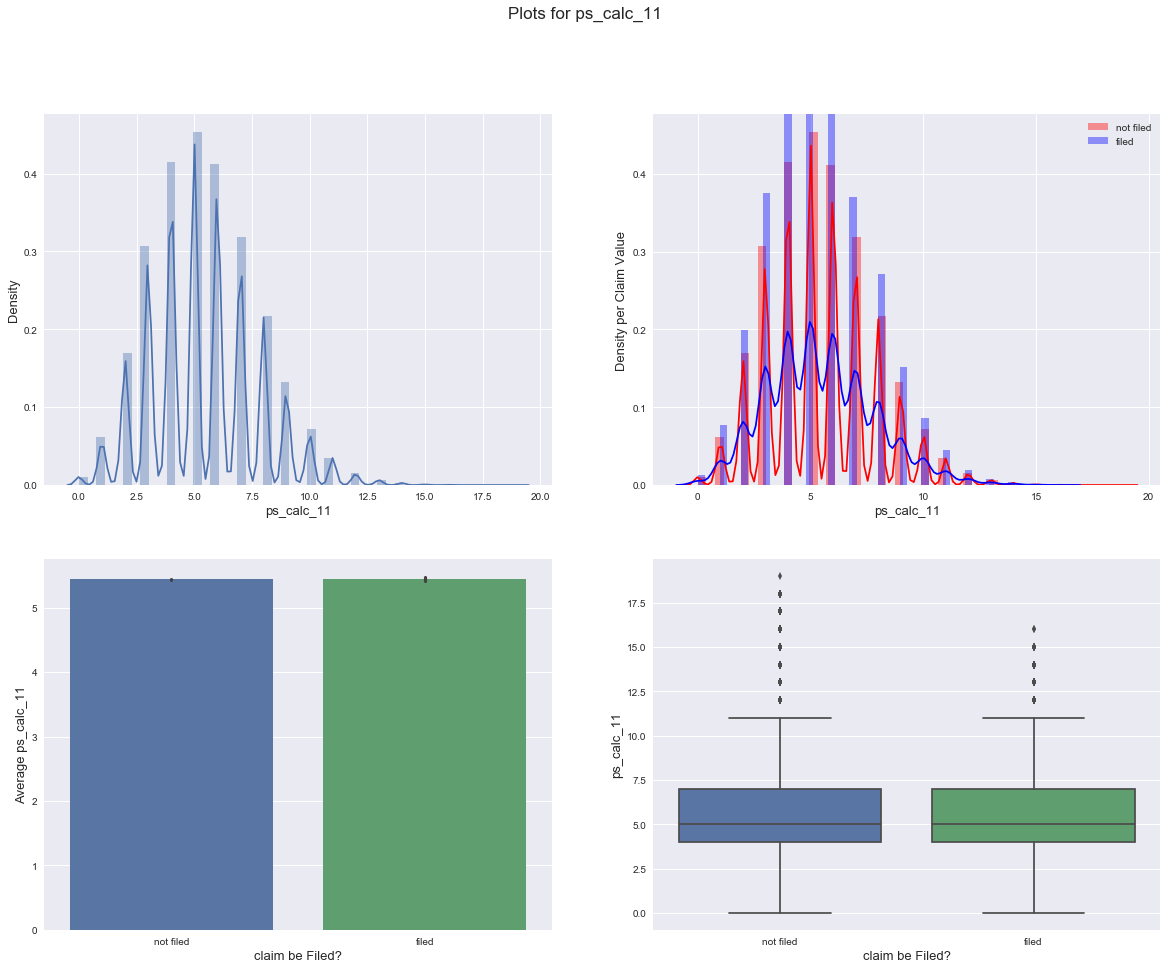

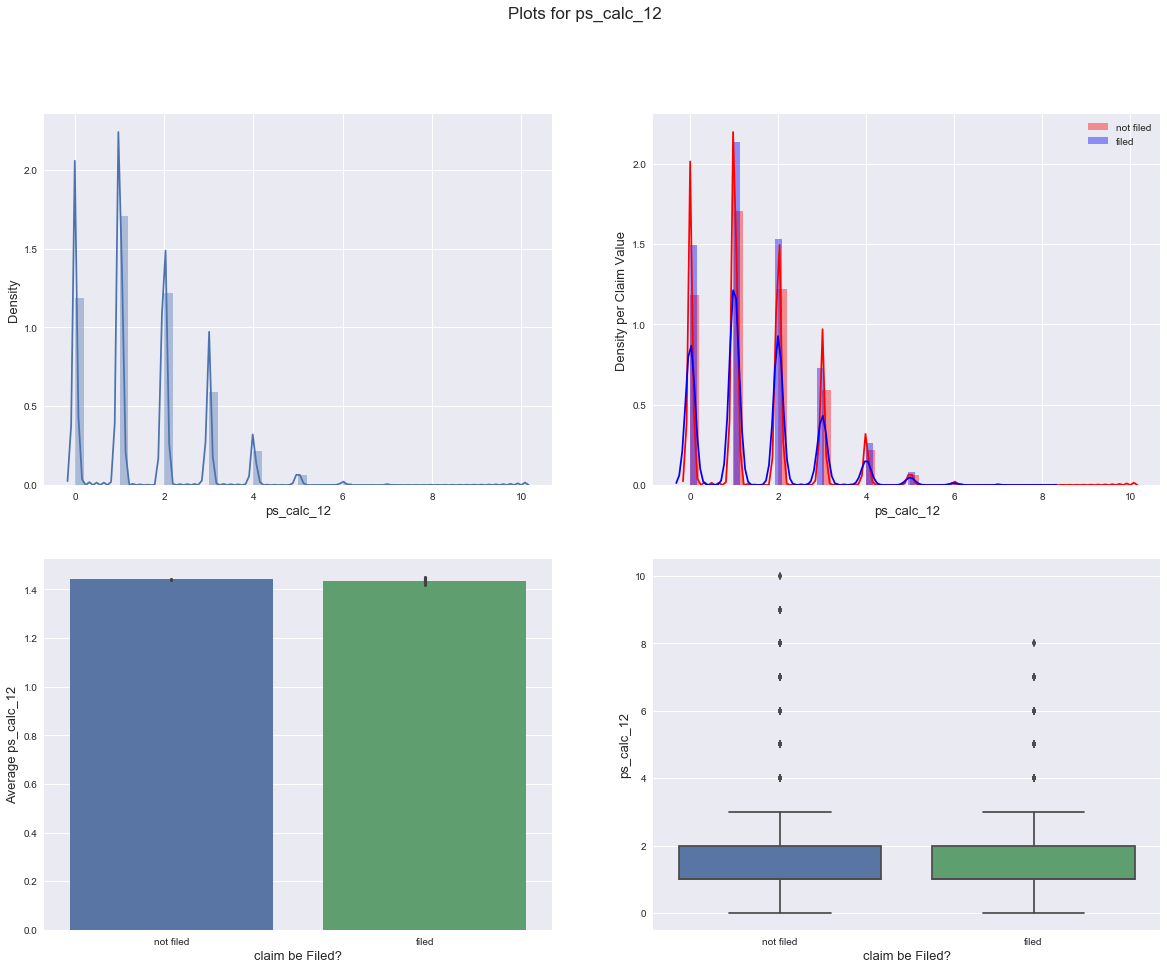

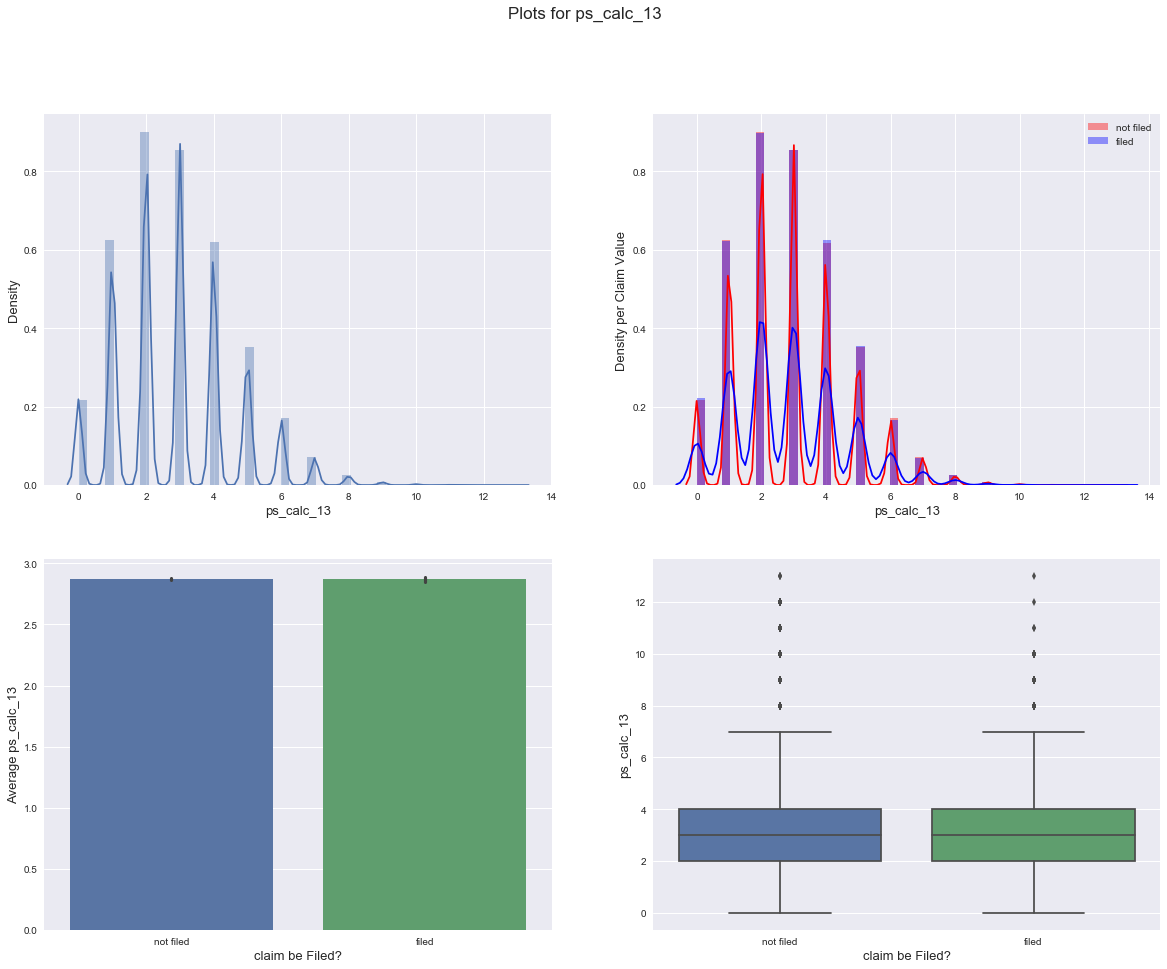

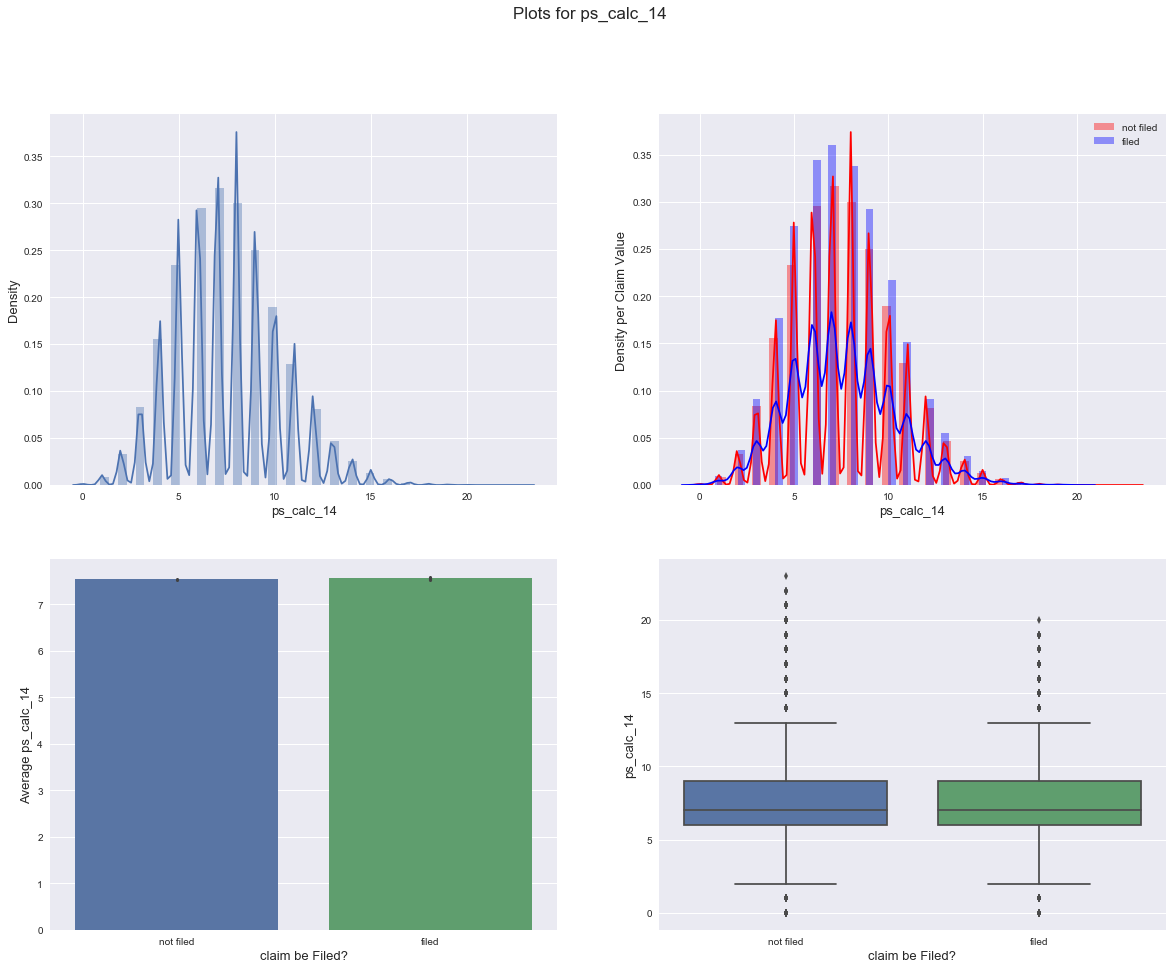

In [19]:
# Numeric feature exploration
out_pdf = r'/Users/xinyaliu/Desktop/python_plot/numeric.pdf'
pdf = matplotlib.backends.backend_pdf.PdfPages(out_pdf)
for column in num_feature:
    fig = plt.figure(figsize=(20,15))
    
    # distribution plot
    sns.distplot(trainset[column], ax=plt.subplot(221))
    plt.xlabel(column, fontsize=13)
    plt.ylabel('Density', fontsize=13)
    plt.suptitle('Plots for ' + column, fontsize=17)
    
    # distribution per claim value
    sns.distplot(trainset.loc[trainset.target==0, column], 
                 color='red', label='not filed', ax=plt.subplot(222))
    sns.distplot(trainset.loc[trainset.target==1, column], 
                 color='blue', label='filed', ax=plt.subplot(222))
    plt.xlabel(column, fontsize=13)
    plt.ylabel('Density per Claim Value', fontsize=13)
    plt.legend(loc='best')
    
    # average (mean) column value per claim value
    sns.barplot(x='target_name', y=column, data=trainset,
               ax=plt.subplot(223))
    plt.xlabel('claim be Filed?', fontsize=13)
    plt.ylabel('Average '+ column, fontsize=13)
    
    # column value per claim value
    sns.boxplot(x='target_name', y=column, data=trainset,
               ax=plt.subplot(224))
    plt.xlabel('claim be Filed?', fontsize=13)
    plt.ylabel(column, fontsize=13)
    
    pdf.savefig(fig)
    plt.show()
pdf.close()

ps_calc_* features are not correlated to target variable at all;
From crrelation matrix, they also are not correlated with other features that have some degrees of correlation with target variable.
Removing them would lower the dimensionality for analysis.


/Users/xinyaliu/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/Users/xinyaliu/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


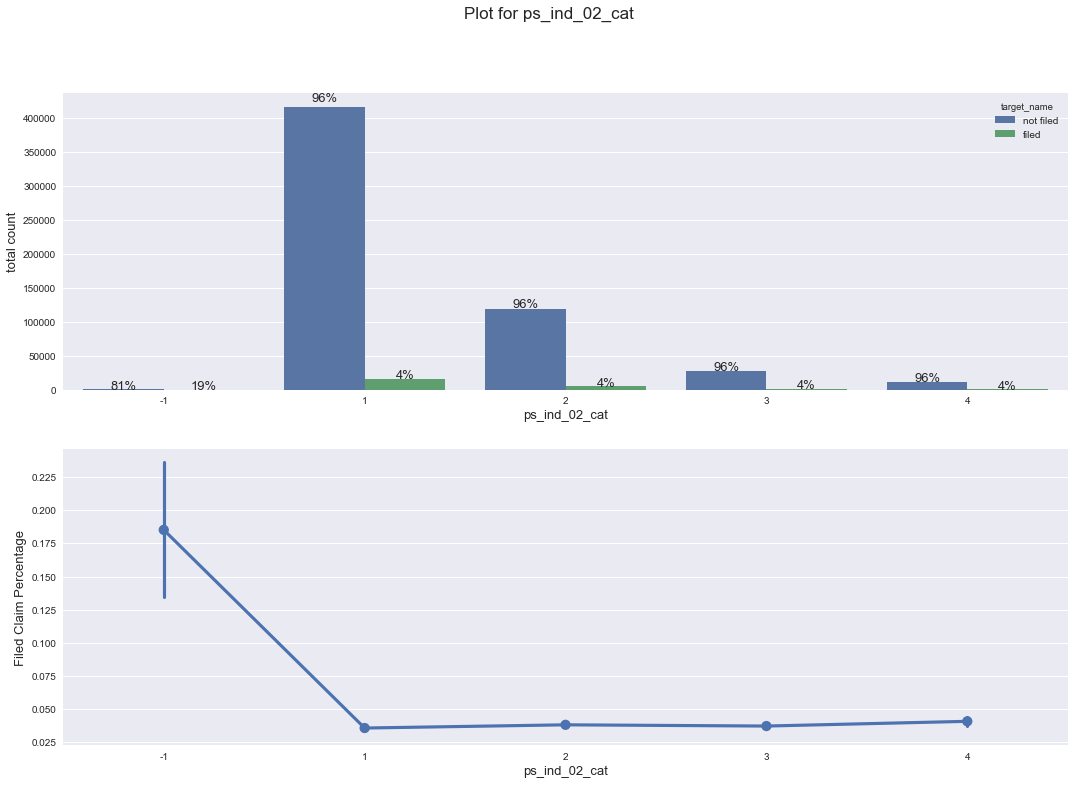

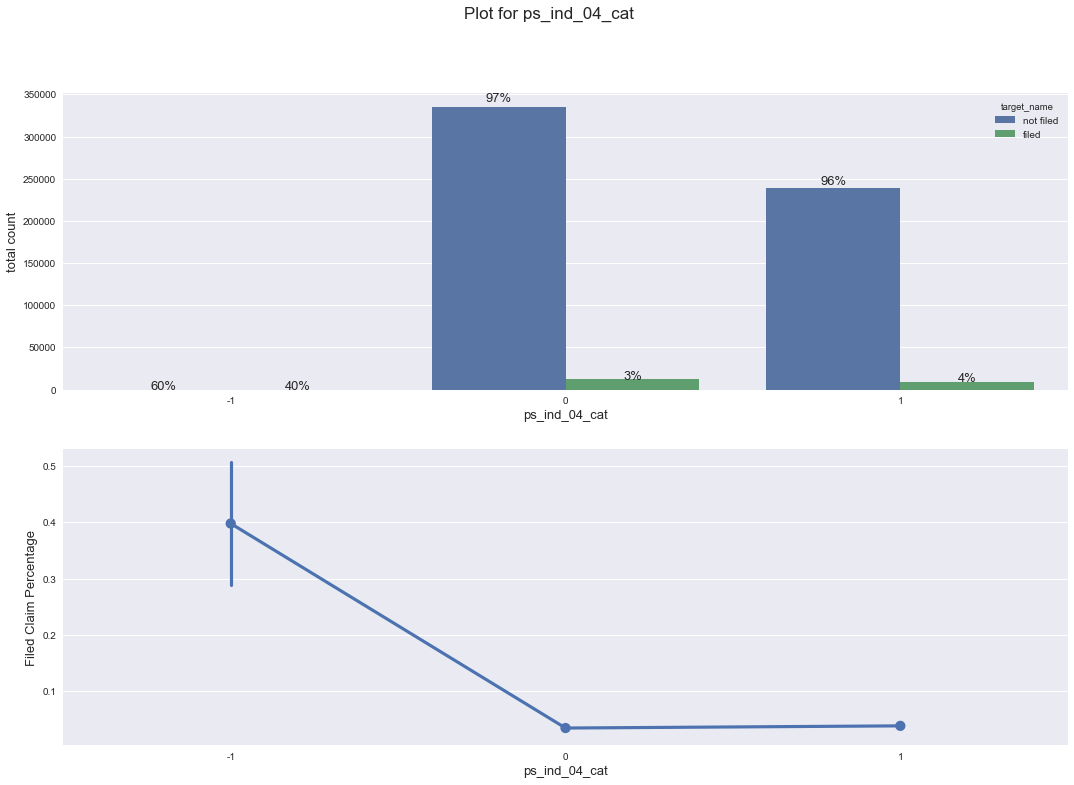

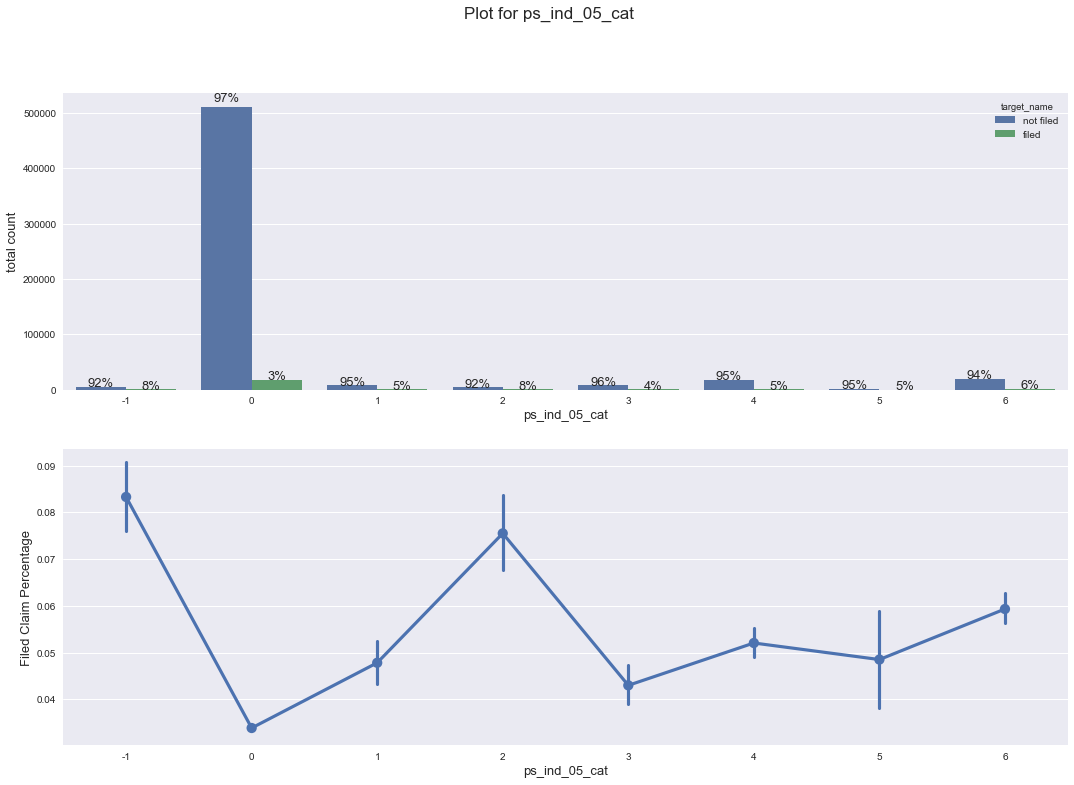

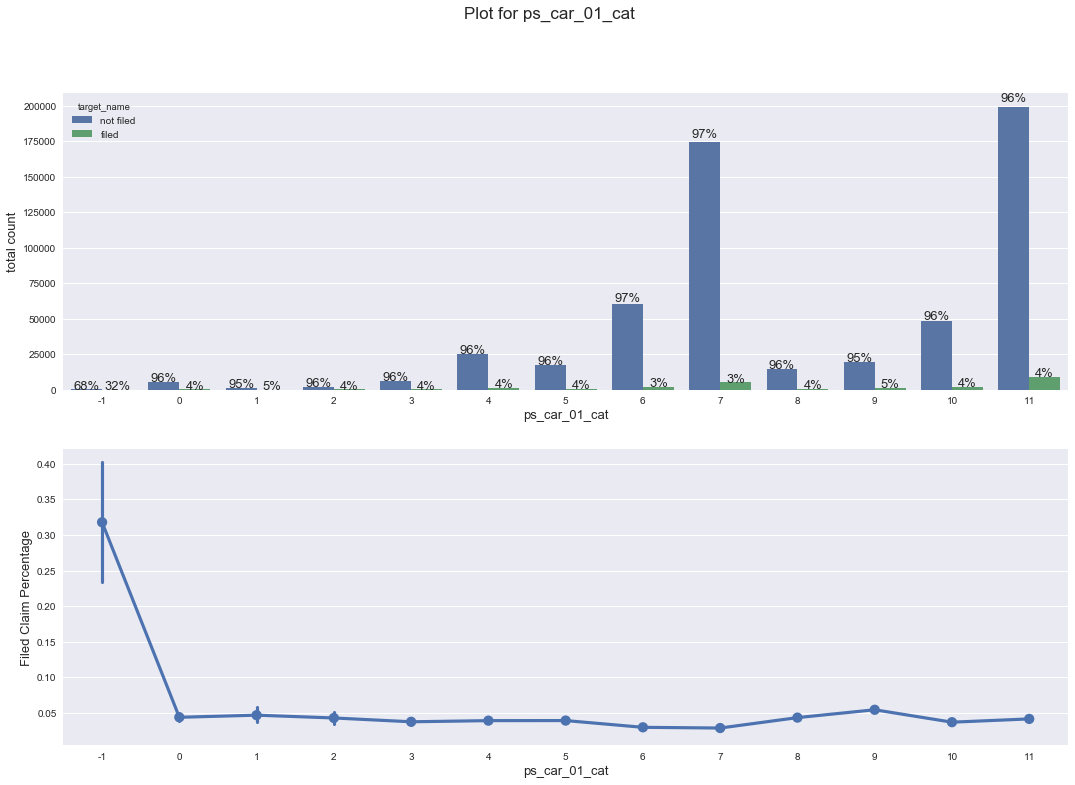

posx and posy should be finite values
posx and posy should be finite values
/Users/xinyaliu/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/xinyaliu/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: cannot convert float NaN to integer

<Figure size 1296x864 with 2 Axes>

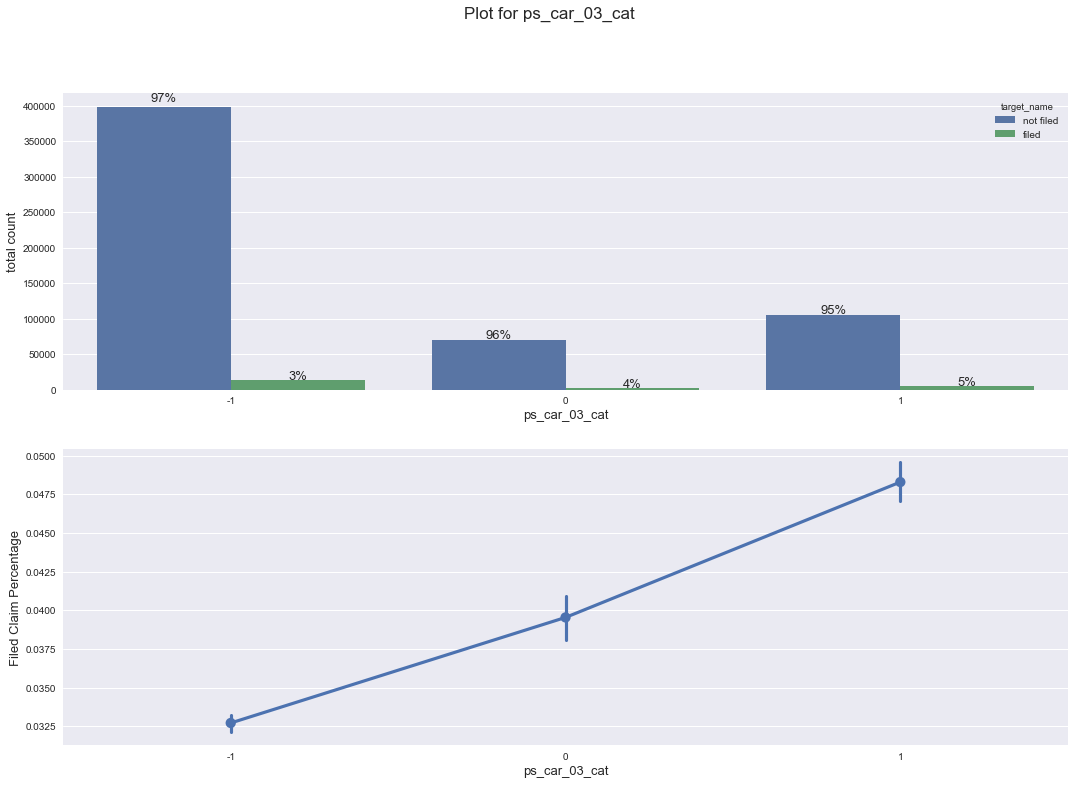

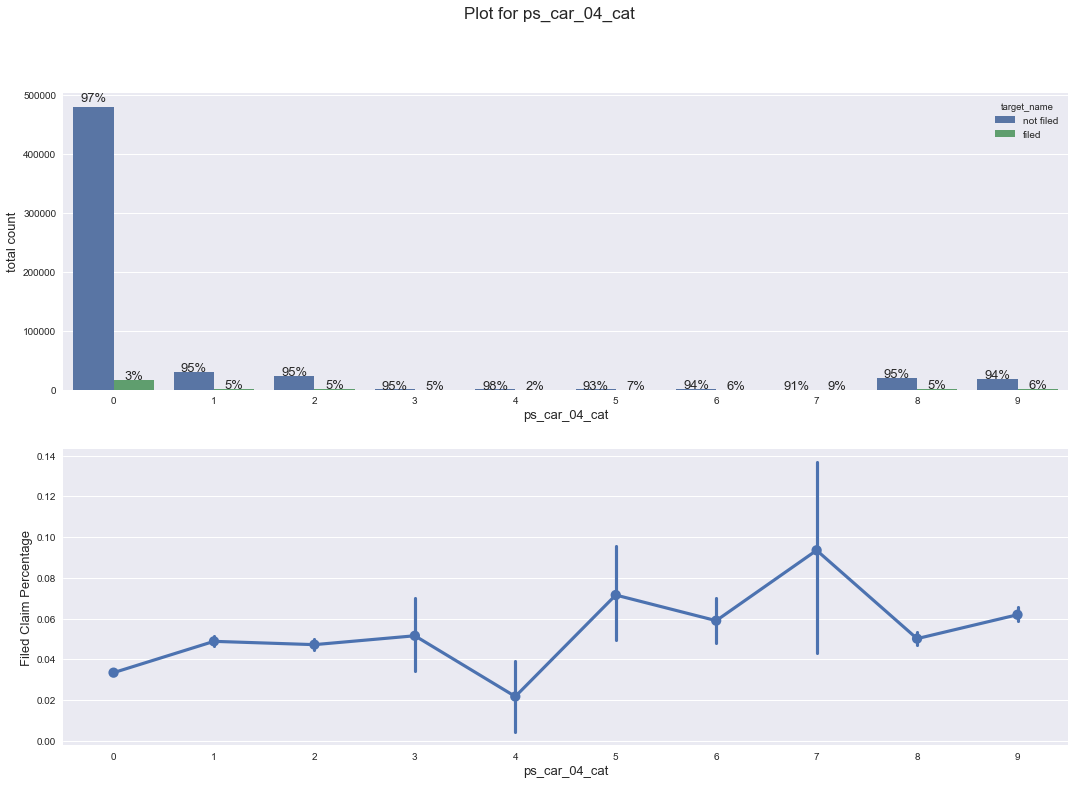

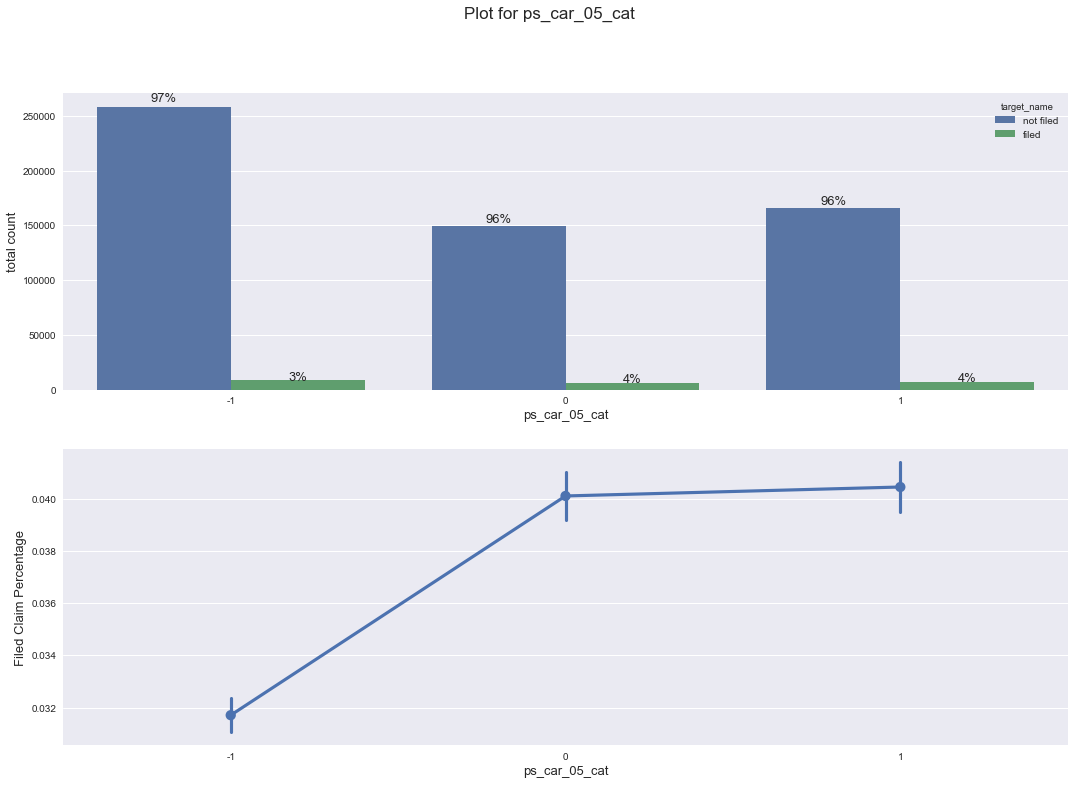

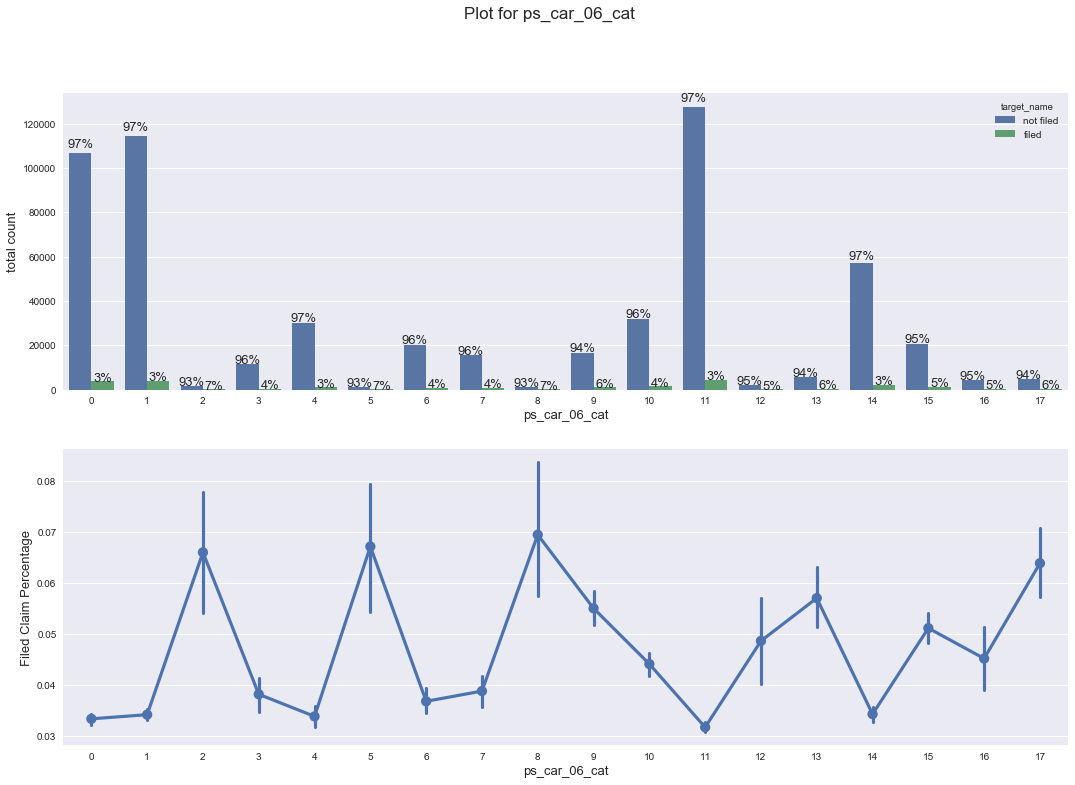

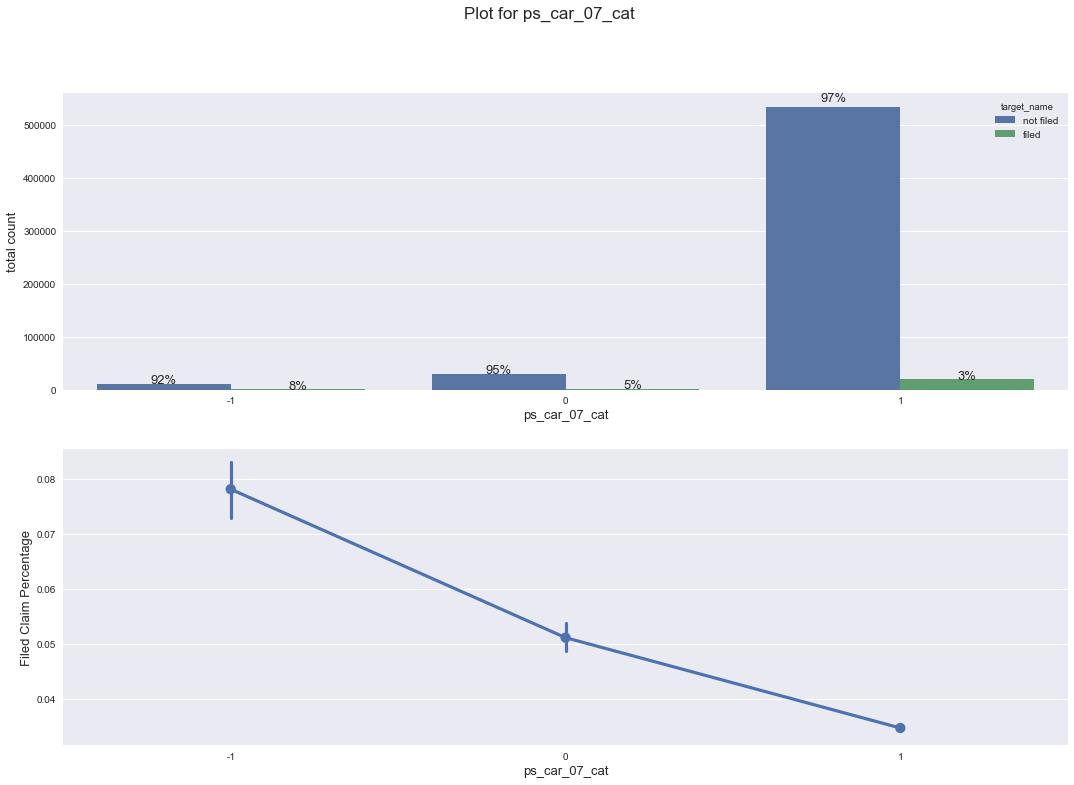

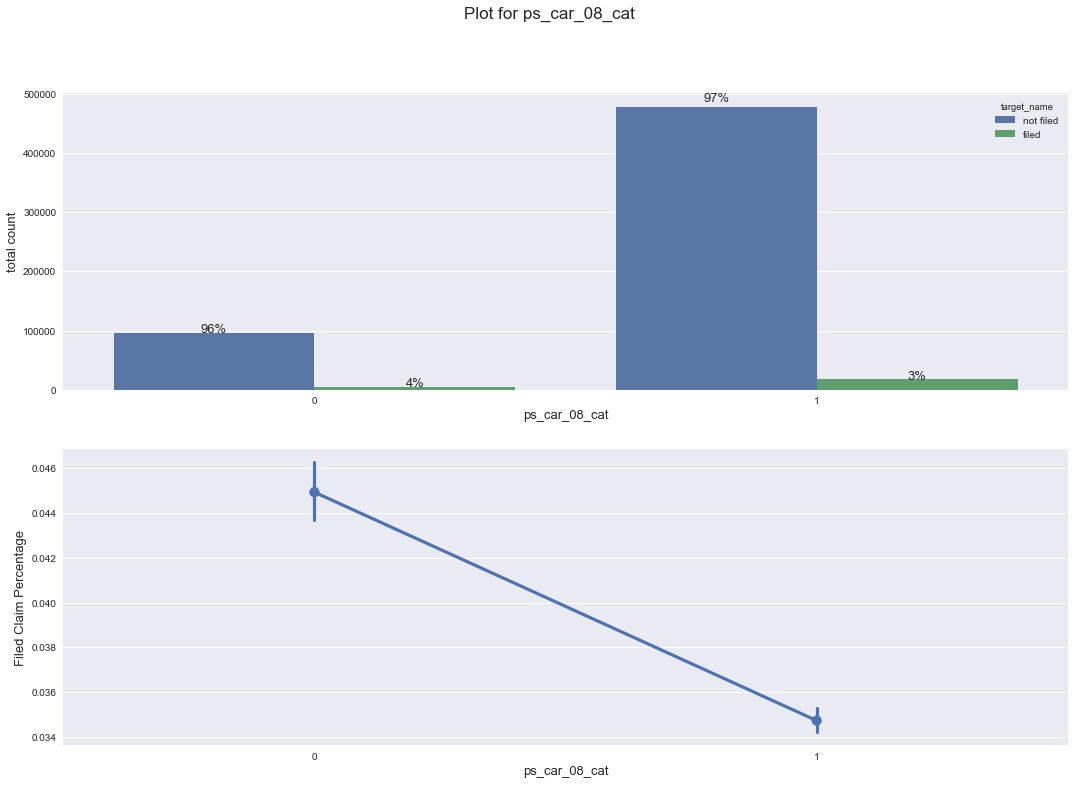

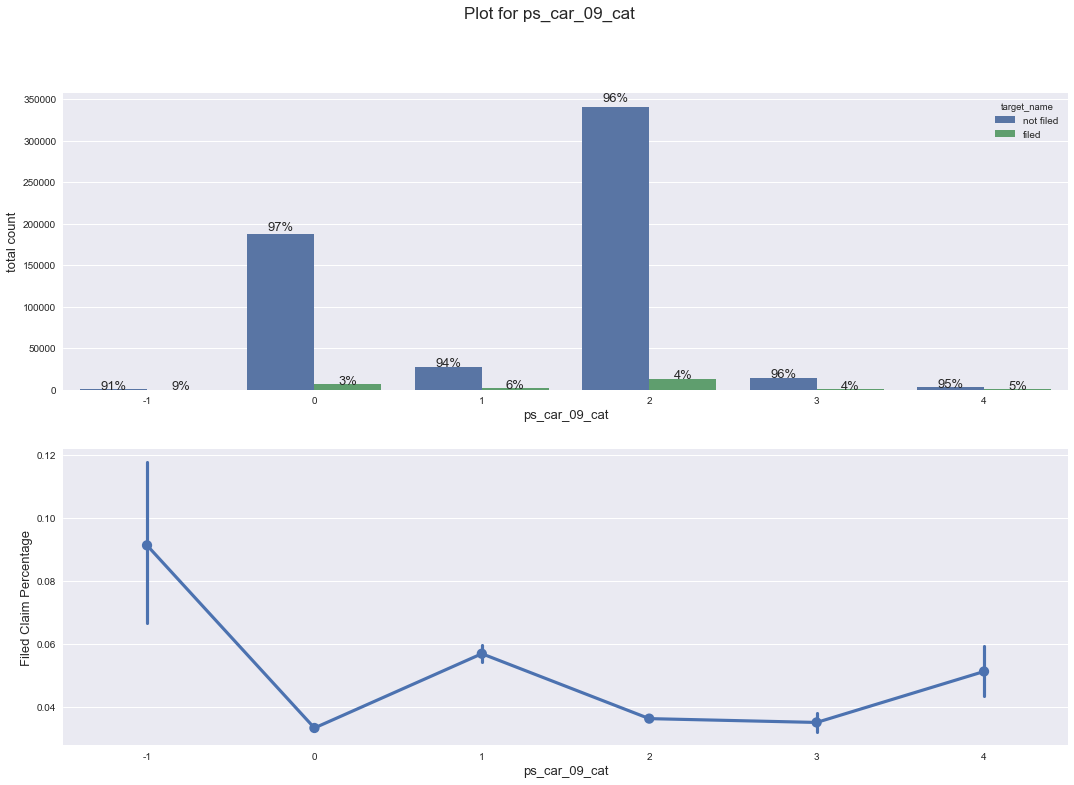

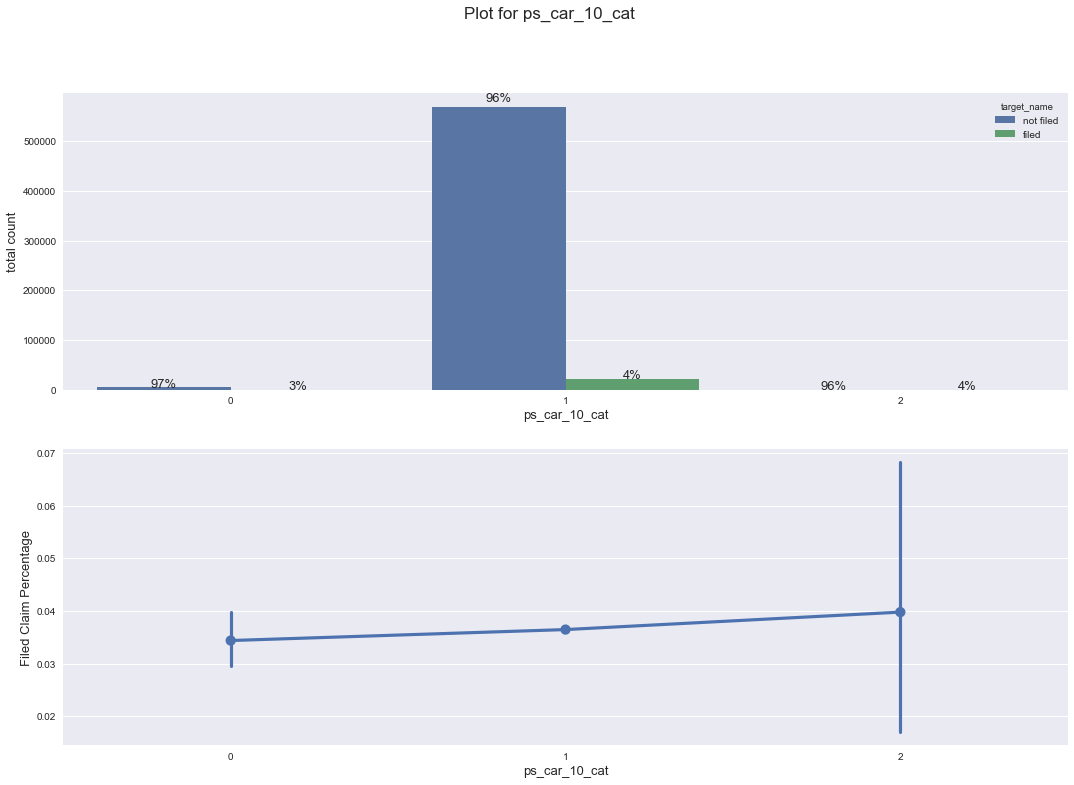

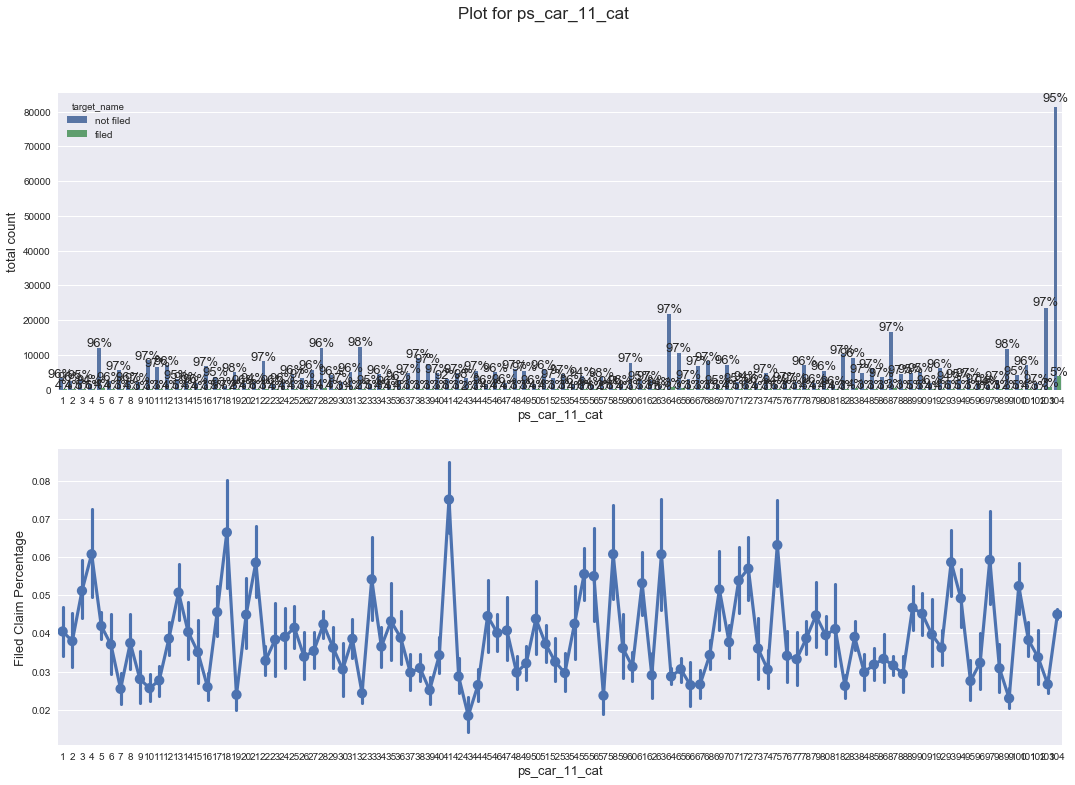

In [27]:
# Categorical feature exploration
out_pdf = r'/Users/xinyaliu/Desktop/python_plot/categorical.pdf'
pdf = matplotlib.backends.backend_pdf.PdfPages(out_pdf)
for column in cat_feature:
    fig = plt.figure(figsize=(18,12))
    sns.set(style="darkgrid")

    # counts per category, seperated into target pairs
    ax = sns.countplot(x=column, hue='target_name', 
                       data=trainset,ax=plt.subplot(211))
    plt.xlabel(column, fontsize=13)
    plt.ylabel('total count', fontsize=13)
    plt.suptitle('Plot for '+column, fontsize=17)

    # add percentage over bars
    height = [h.get_height() for h in ax.patches]
    ncol = int(len(height)/2)
    total = [height[i] + height[i+ncol] for i in range(ncol)]*2
    for i, h in enumerate(ax.patches):
        ax.text(h.get_x()+h.get_width()/2, height[i]*1.02+100,
        '{:1.0%}'.format(height[i]/total[i]), ha="center", size=13)
    
    # percentage of filed claims for every value of feature variables
    sns.pointplot(x=column, y='target', data=trainset, 
                  ax=plt.subplot(212))
    plt.xlabel(column, fontsize=13)
    plt.ylabel('Filed Claim Percentage', fontsize=13)
    
    pdf.savefig(fig)
    plt.show()
pdf.close()       

/Users/xinyaliu/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/Users/xinyaliu/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


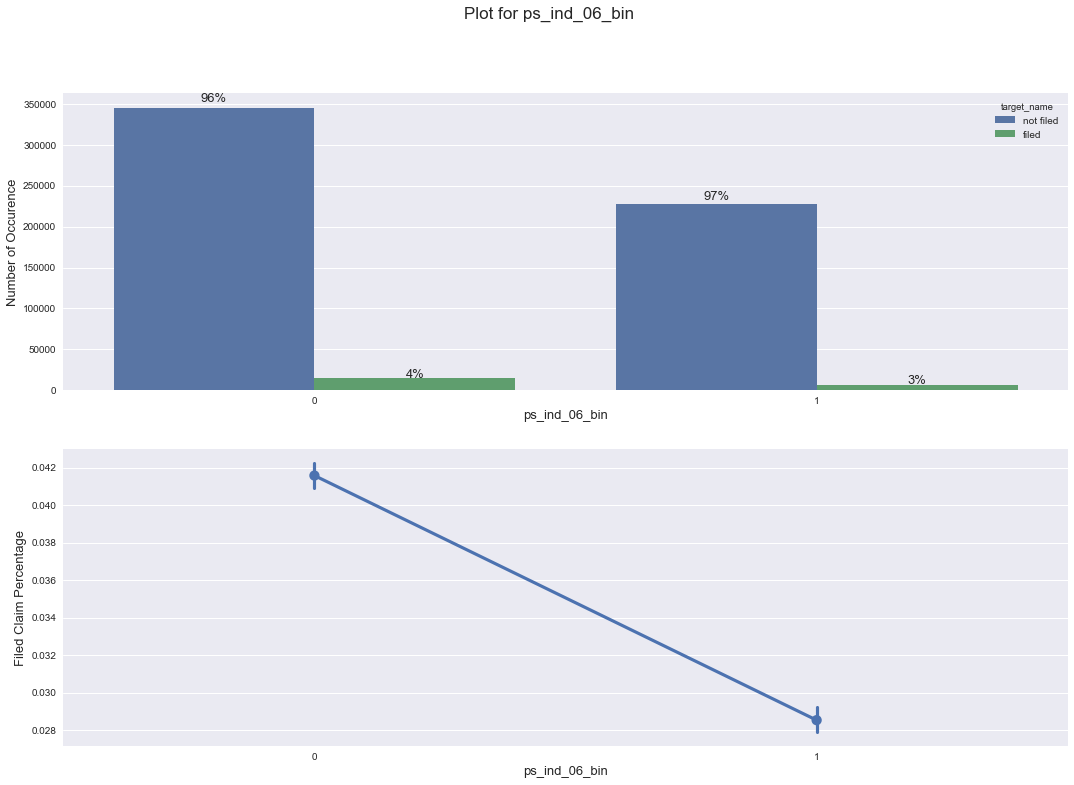

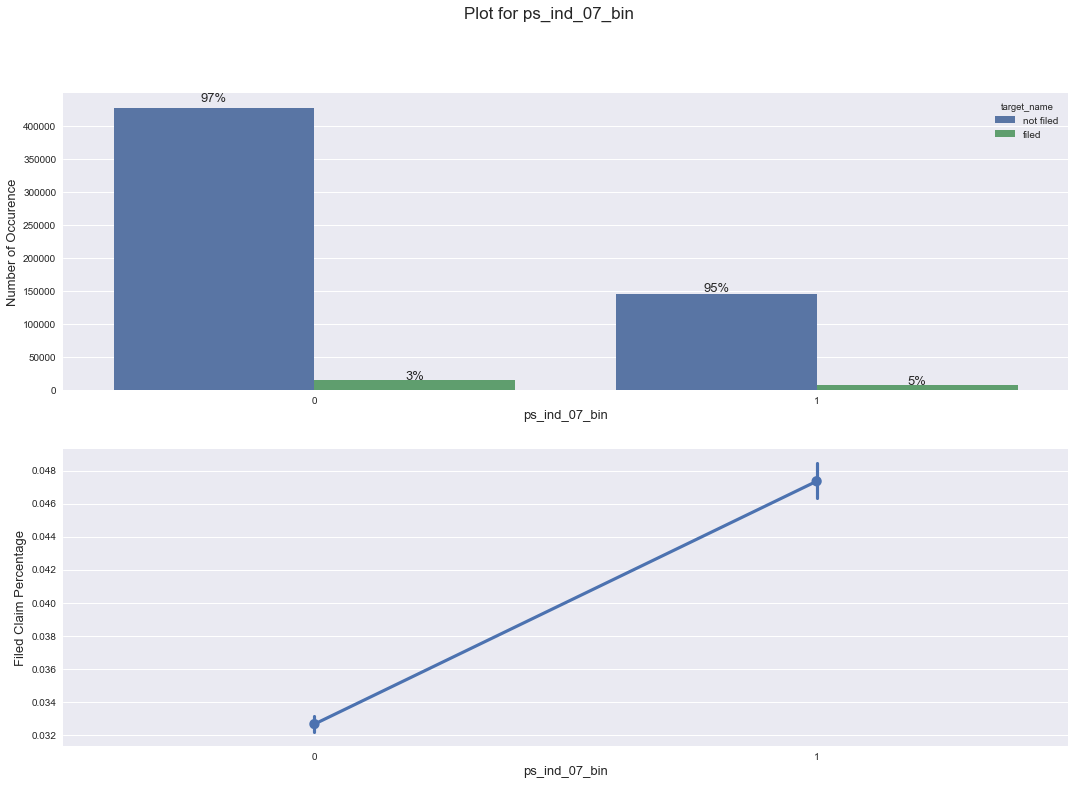

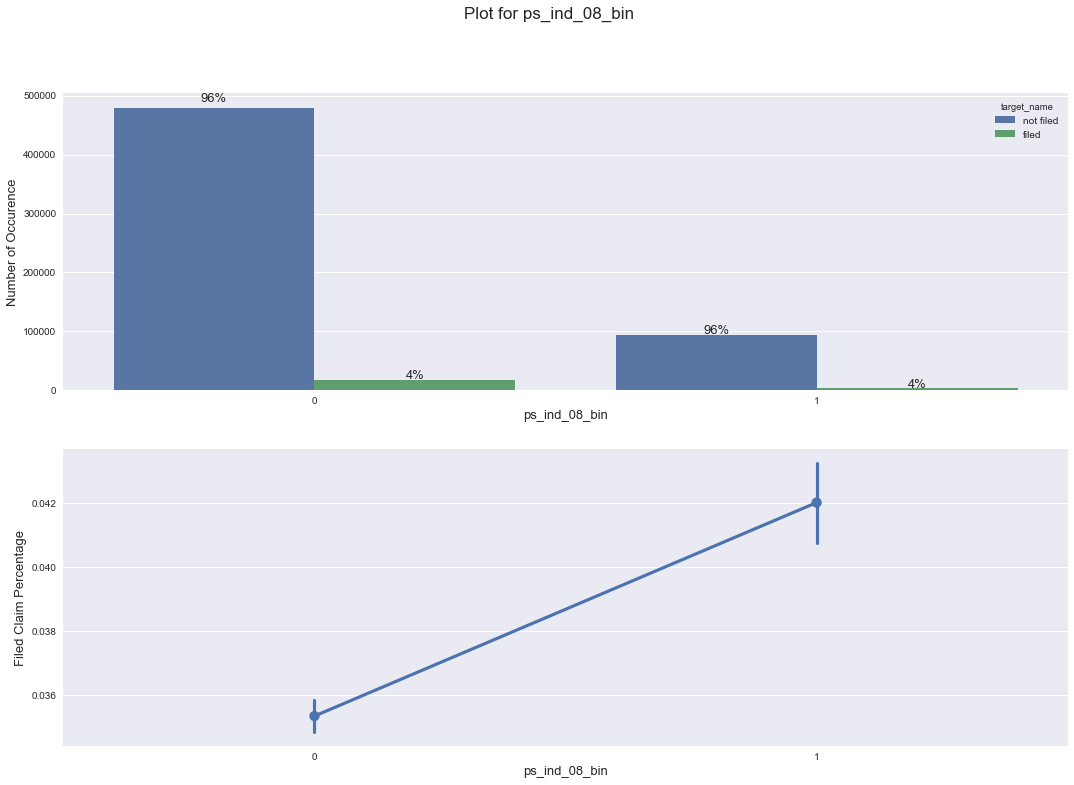

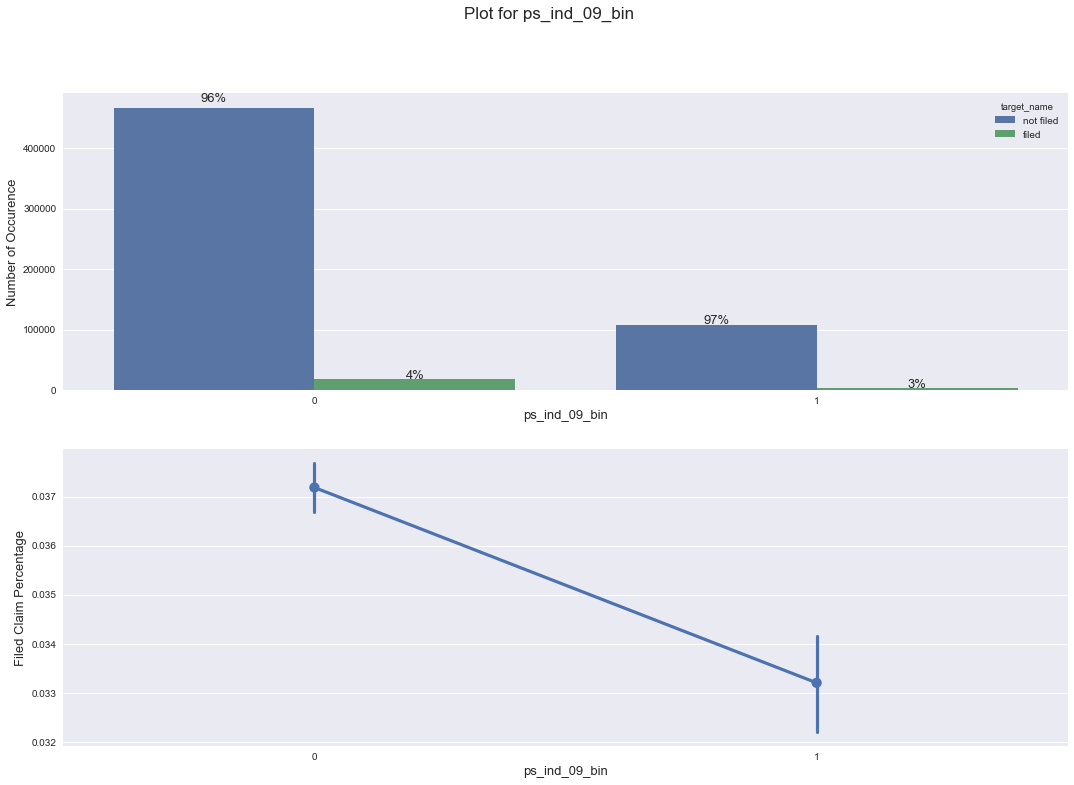

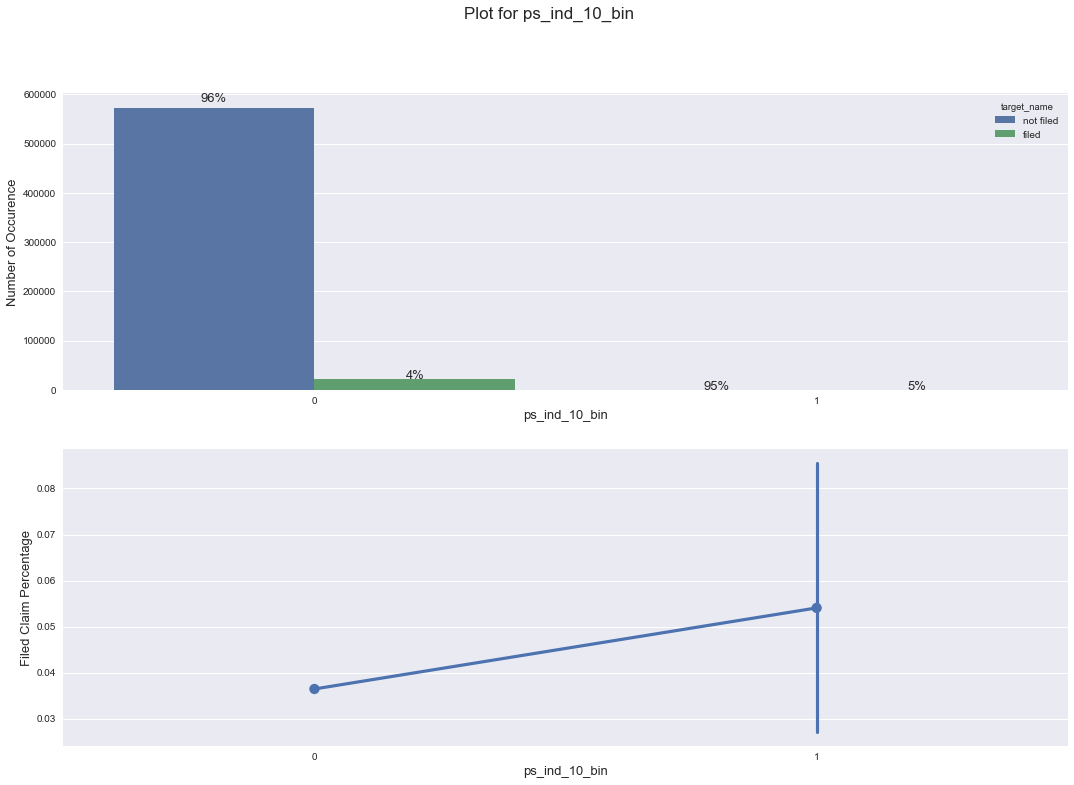

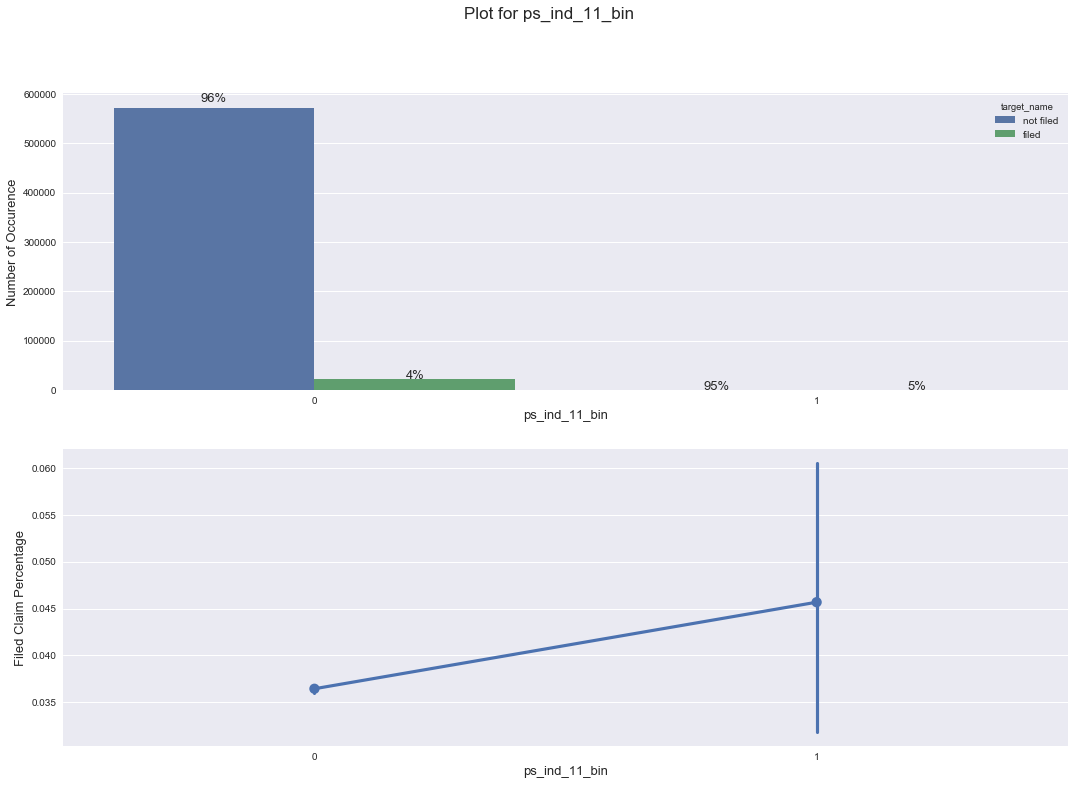

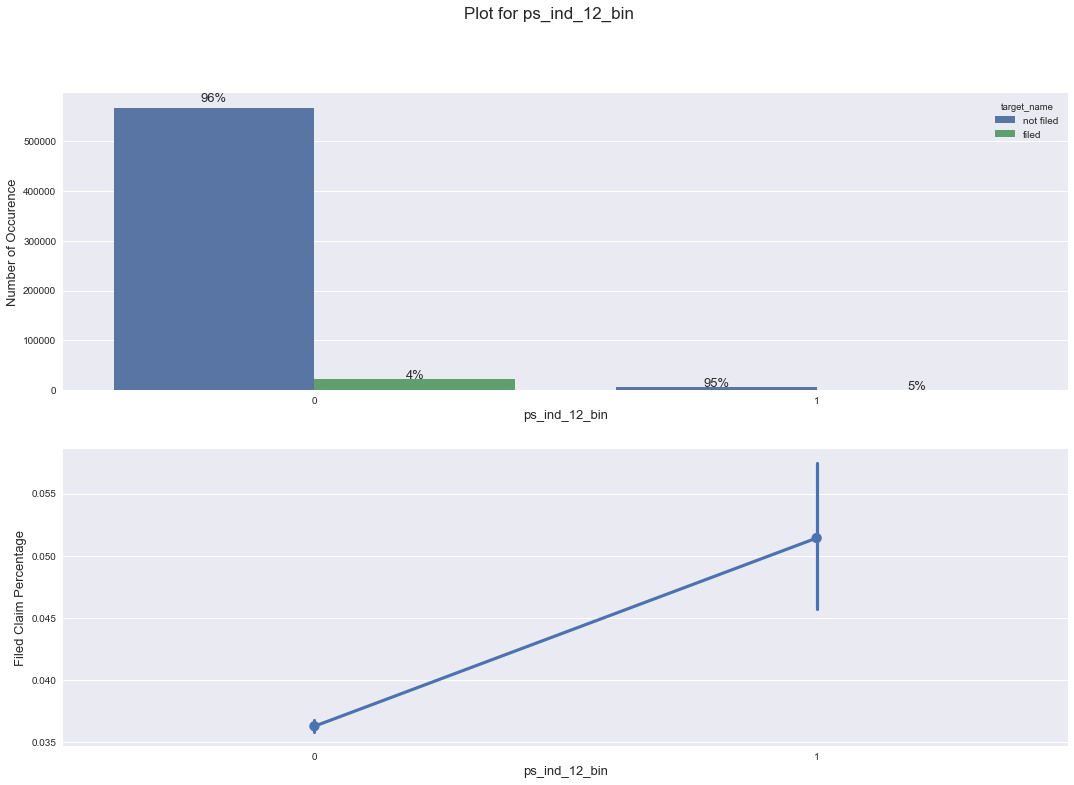

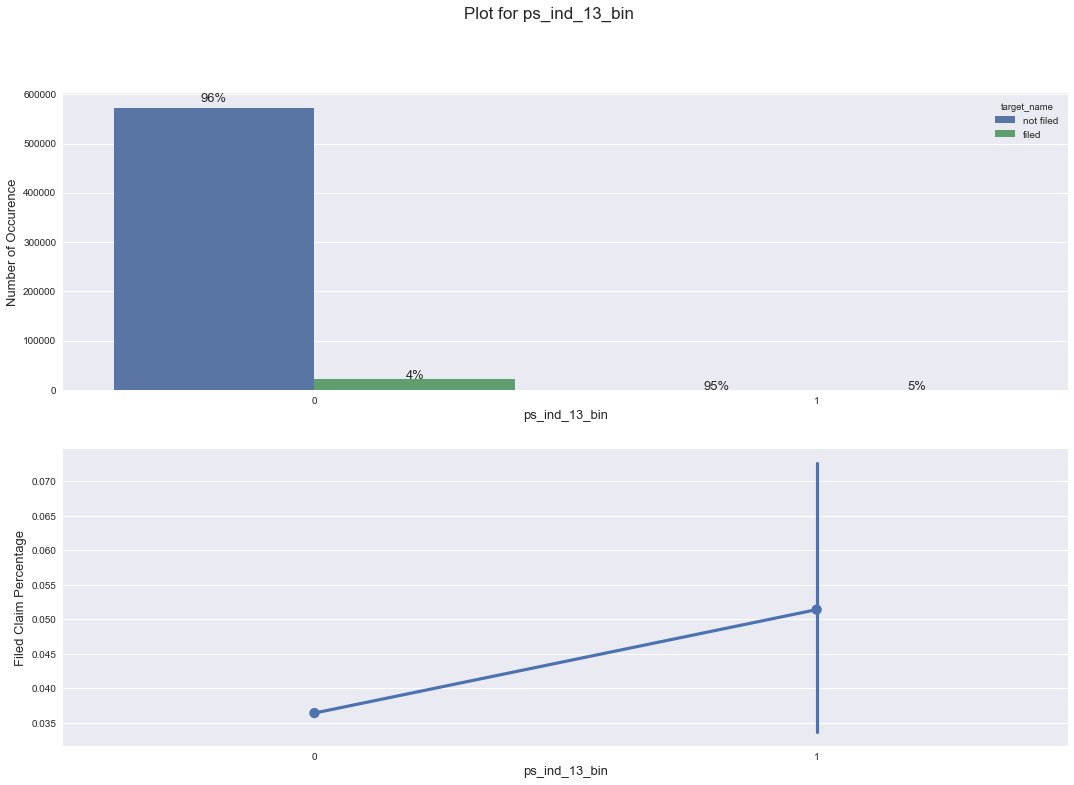

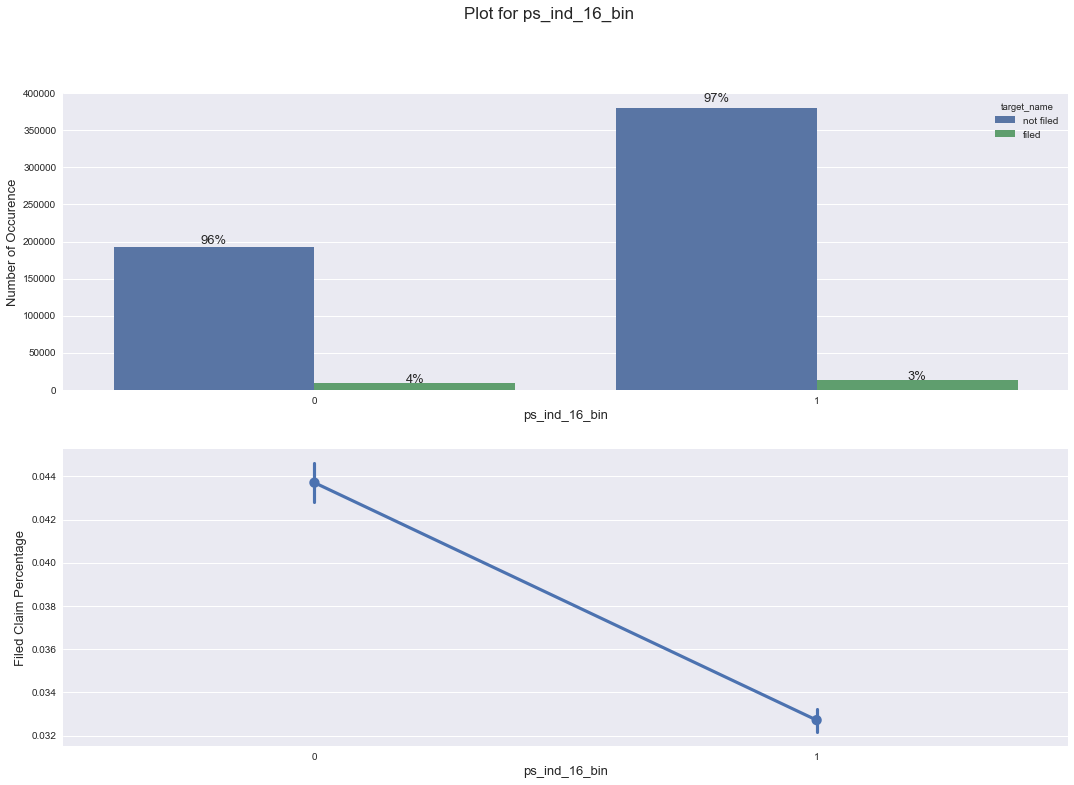

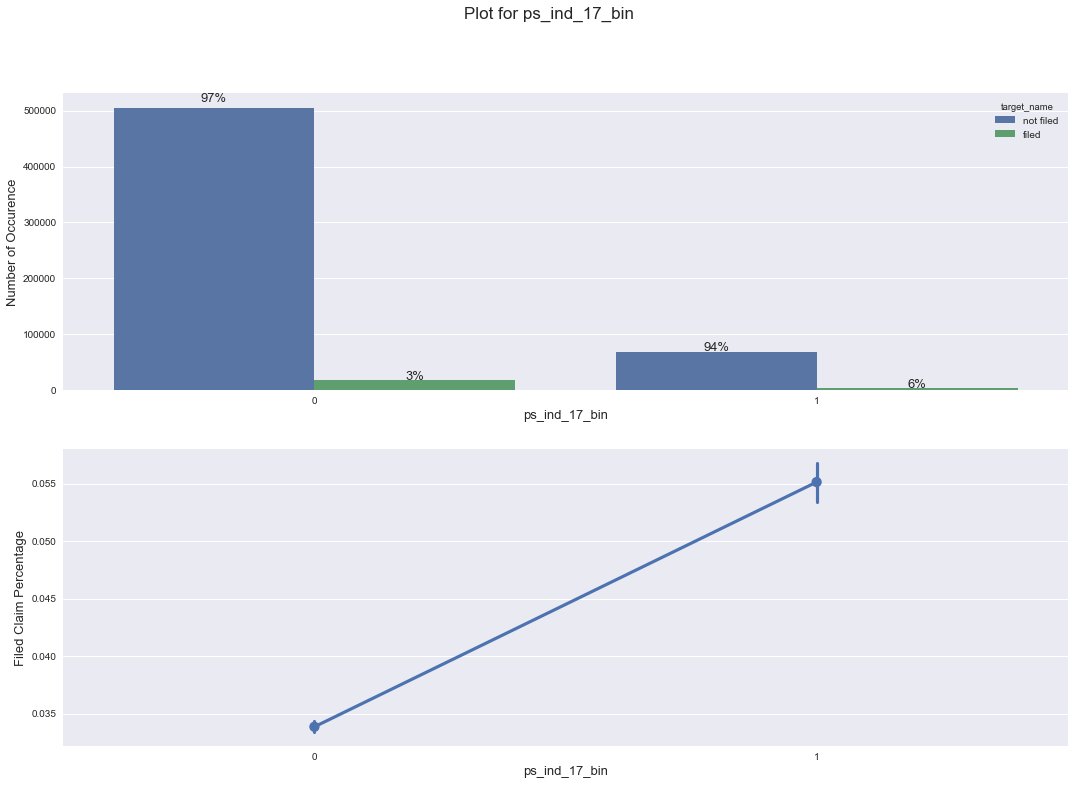

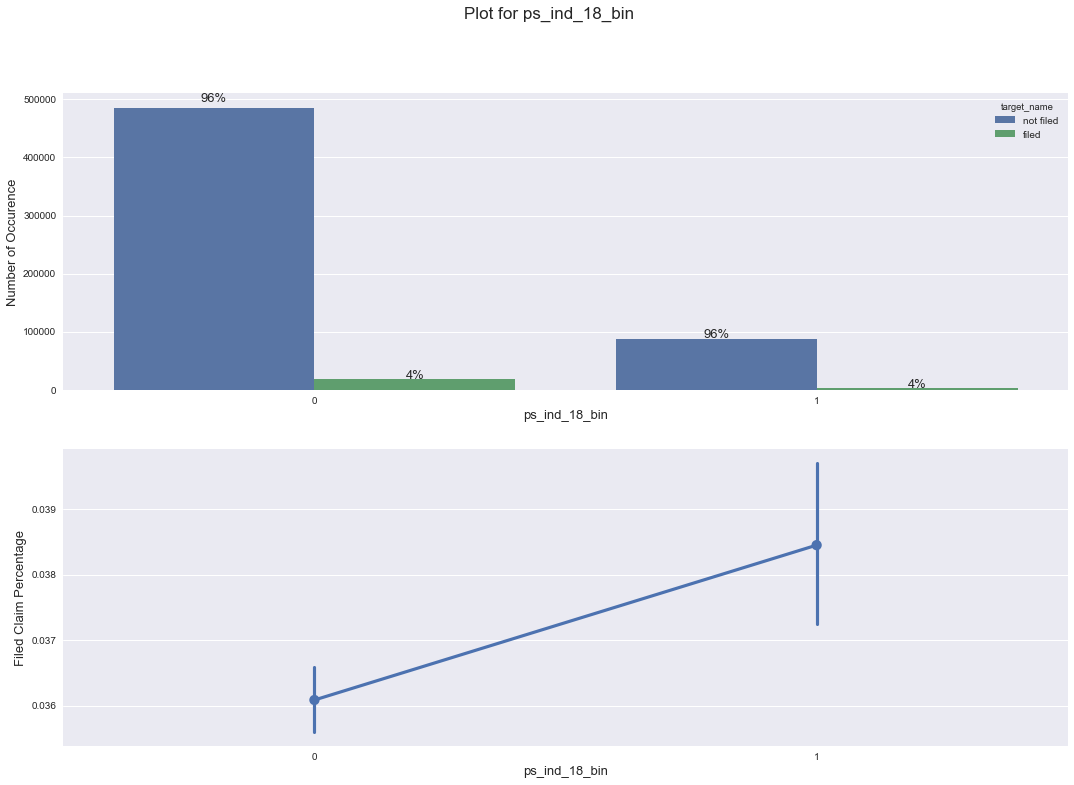

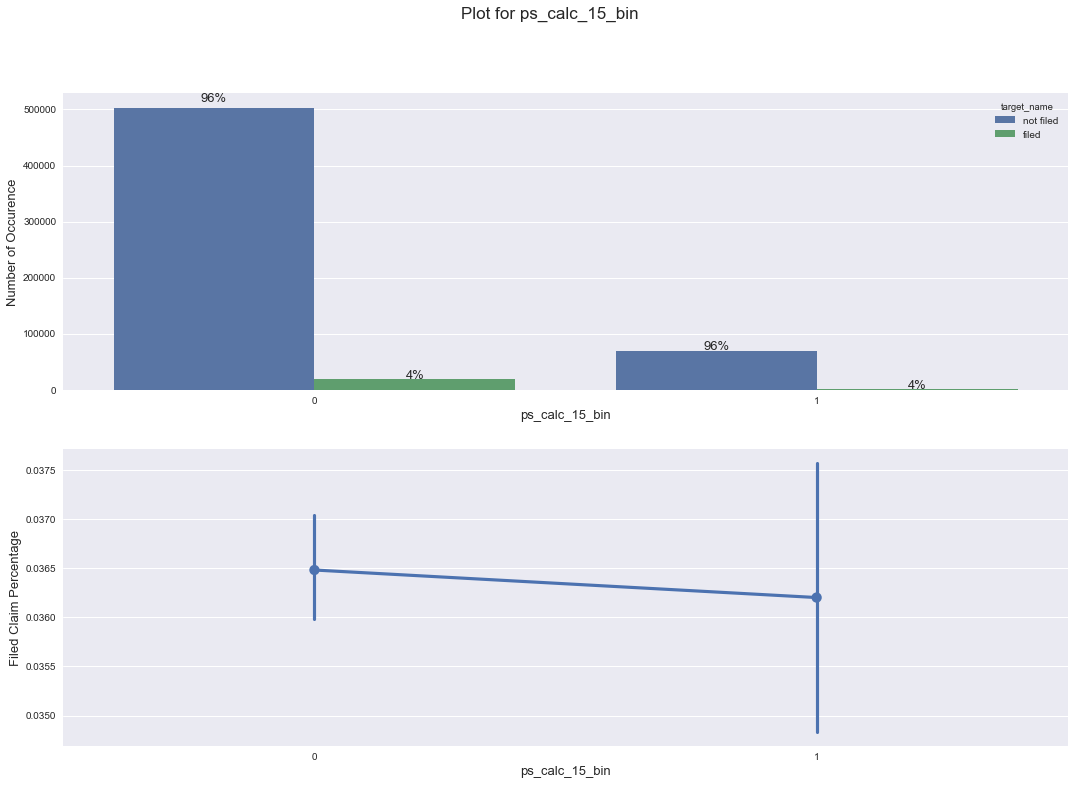

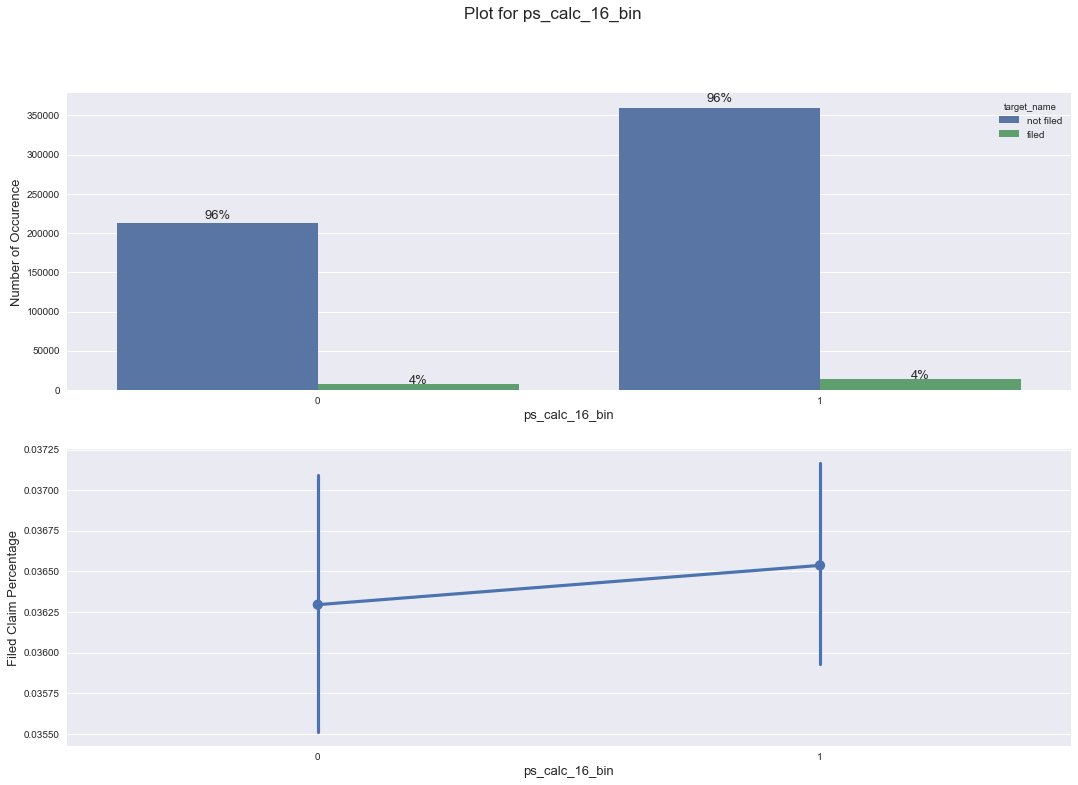

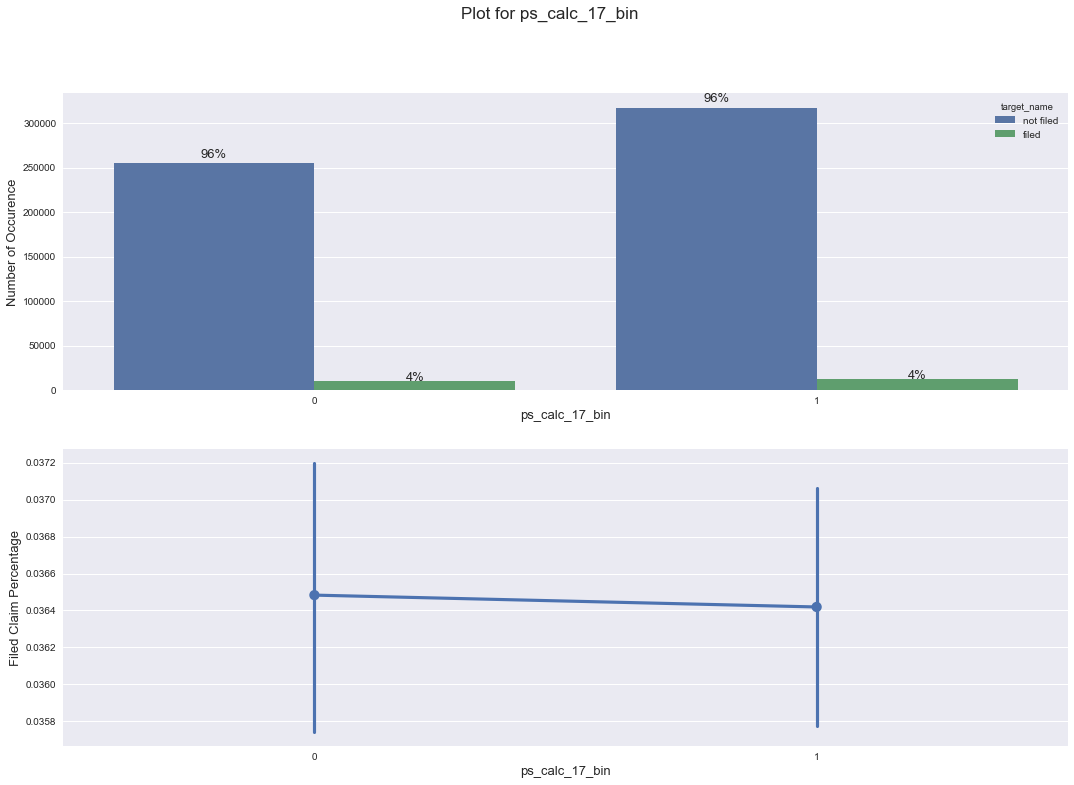

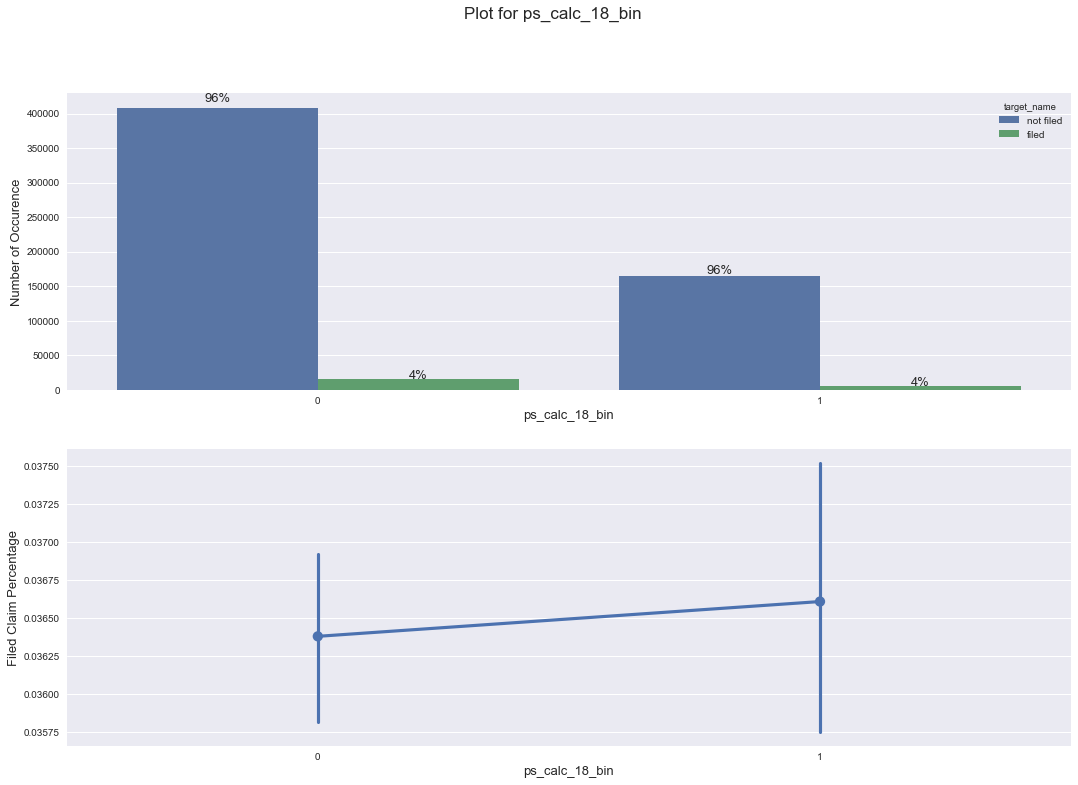

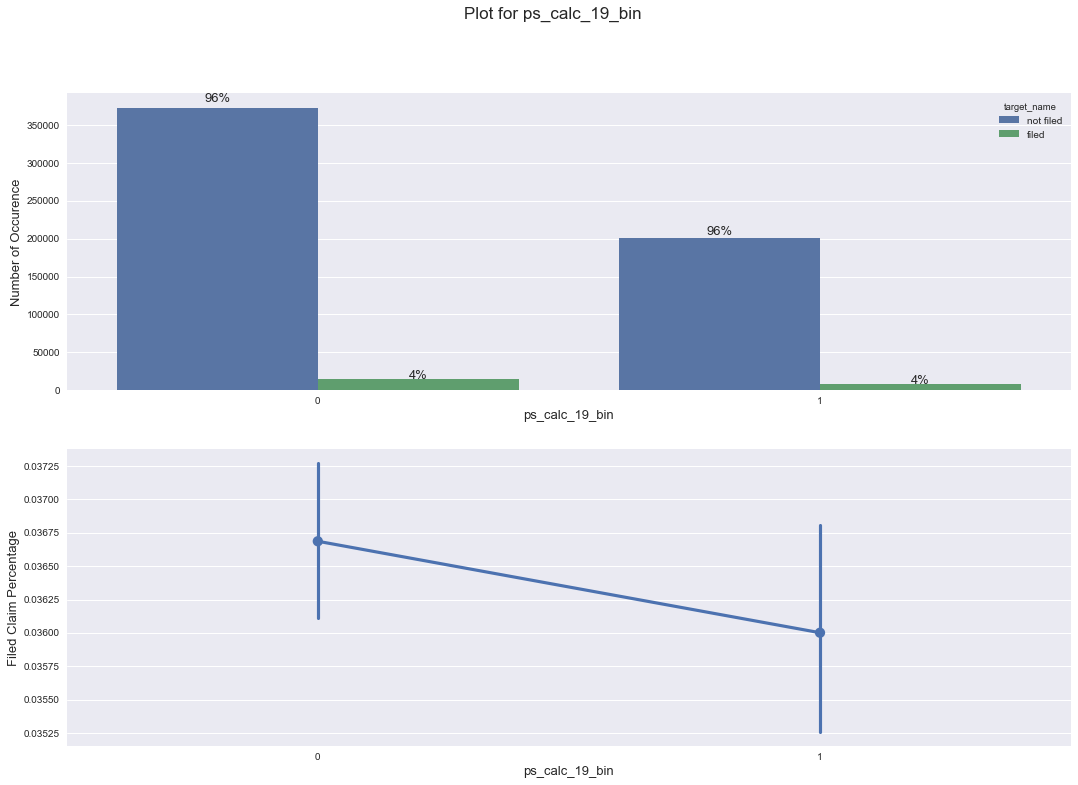

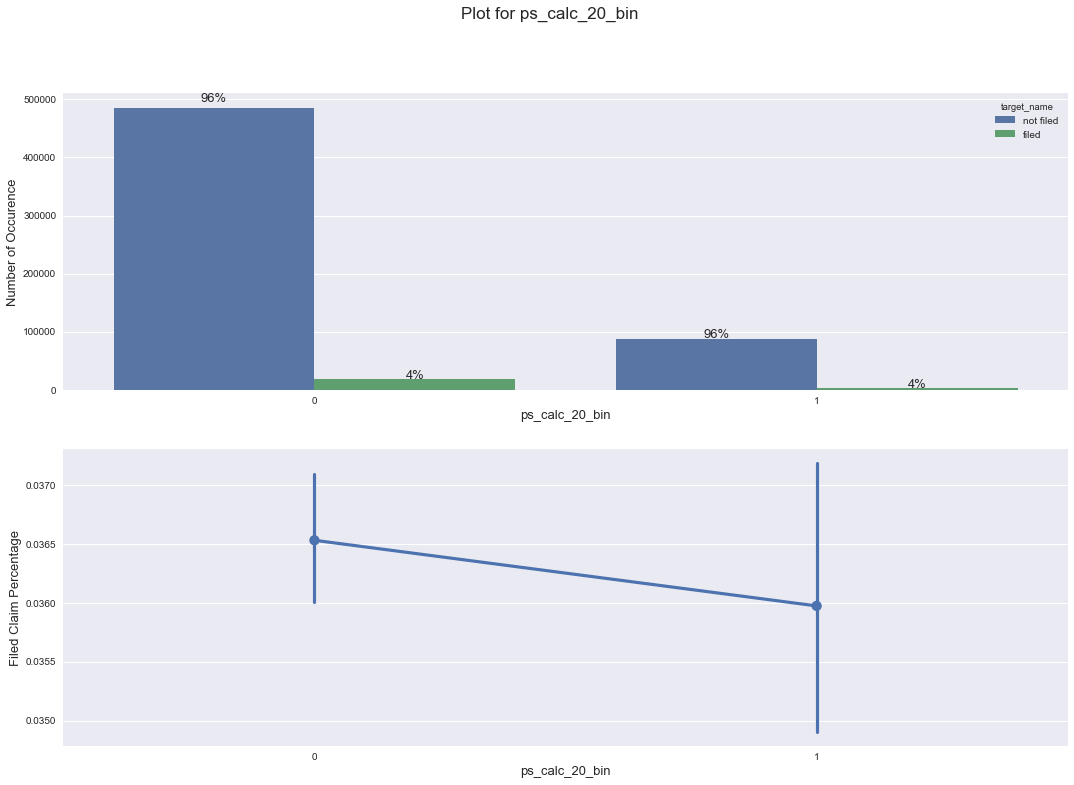

In [47]:
# Binary feature exploration
out_pdf = r'/Users/xinyaliu/Desktop/python_plot/binary.pdf'
pdf = matplotlib.backends.backend_pdf.PdfPages(out_pdf)
for column in bin_feature:
    fig = plt.figure(figsize=(18,12))
    sns.set(style="darkgrid")
    
    # number of occurence per binary value, separated by target pairs
    ax = sns.countplot(x=column, hue='target_name', 
                       data=trainset,ax=plt.subplot(211))
    plt.xlabel(column, fontsize=13)
    plt.ylabel('Number of Occurence', fontsize=13)
    plt.suptitle('Plot for '+column, fontsize=17)
    
    # add percentage over bars
    height = [h.get_height() for h in ax.patches]
    ncol = int(len(height)/2)
    total = [height[i] + height[i+ncol] for i in range(ncol)]*2
    for i, h in enumerate(ax.patches):
        ax.text(h.get_x()+h.get_width()/2, height[i]*1.02+100,
        '{:1.0%}'.format(height[i]/total[i]), ha="center", size=13)
    
    # percentage of filed claims for every value of feature
    sns.pointplot(x=column, y='target', data=trainset, 
                  ax=plt.subplot(212))
    plt.xlabel(column, fontsize=13)
    plt.ylabel('Filed Claim Percentage', fontsize=13)
    
    pdf.savefig(fig)
    plt.show()
pdf.close()

In [20]:
# Data Engineer
# drop calc columns: as recommended before, observed from descriptive analysis
col_to_drop = trainset.columns[trainset.columns.str.startswith('ps_calc_')]
trainset_new = trainset.drop(col_to_drop, axis=1)
testset_new = testset.drop(col_to_drop, axis=1)

In [21]:
trainset_new.head()

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin     ...       \
0              0              0              1              0     ...        
1              0              0              0              1     ...        
2              0              0              0              1     ...        
3              0              1              0              0     ...        
4              0              1              0              0     ...        

   ps_car_08_cat  ps_car_09_cat  ps_car_10_cat  ps_car_11_cat  ps_car_11  \
0              0              0              1             12          2   
1              1              2              1             19          3   
2              1              2              1             60          1   
3              1              3              1            104          1   
4              1              2              1             82          3   

   ps_car_12  ps_car_13  ps_car_14  ps_car_15  target_name  
0   0.400000   0.883679   0.370810   3.605551    not filed  
1   0.316228   0.618817   0.388716   2.449490    not filed  
2   0.316228   0.641586   0.347275   3.316625    not filed  
3   0.374166   0.542949   0.294958   2.000000    not filed  
4   0.316070   0.565832   0.365103   2.000000    not filed  

[5 rows x 40 columns]

In [22]:
# drop variables with too many missing values: according to the table constructed before
# drop variables ps_car_03_cat, ps_car_05_cat
var_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
trainset_new = trainset_new.drop(var_to_drop, axis=1)
testset_new = testset_new.drop(var_to_drop, axis=1)

In [23]:
trainset_new.head()

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin     ...       \
0              0              0              1              0     ...        
1              0              0              0              1     ...        
2              0              0              0              1     ...        
3              0              1              0              0     ...        
4              0              1              0              0     ...        

   ps_car_08_cat  ps_car_09_cat  ps_car_10_cat  ps_car_11_cat  ps_car_11  \
0              0              0              1             12          2   
1              1              2              1             19          3   
2              1              2              1             60          1   
3              1              3              1            104          1   
4              1              2              1             82          3   

   ps_car_12  ps_car_13  ps_car_14  ps_car_15  target_name  
0   0.400000   0.883679   0.370810   3.605551    not filed  
1   0.316228   0.618817   0.388716   2.449490    not filed  
2   0.316228   0.641586   0.347275   3.316625    not filed  
3   0.374166   0.542949   0.294958   2.000000    not filed  
4   0.316070   0.565832   0.365103   2.000000    not filed  

[5 rows x 38 columns]

In [24]:
# balance the target variable

desired_apriori=0.10

# Get the indices per target value
idx_0 = trainset_new[trainset_new.target == 0].index
idx_1 = trainset_new[trainset_new.target == 1].index

# Get original number of records per target value
nb_0 = len(trainset_new.loc[idx_0])
nb_1 = len(trainset_new.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=314, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
trainset_new = trainset_new.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


In [25]:
trainset_new

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0        321914       0          1              2          4              1   
1        942842       0          6              1          4              0   
2        995457       0          5              1          9              1   
3        202081       0          0              1          9              1   
4       1295934       0          0              1         10              0   
5        333193       0          3              1          8              0   
6        947246       0          1              1          5              0   
7       1118432       0          0              2          0              0   
8        760881       0          7              1          5              1   
9        311211       0          0              1          1              1   
10      1106945       0          4              1          1              0   
11      1436781       0          1              1         10              0   
12      1190432       0          0              2          1              0   
13       437255       0          4              2          5              0   
14       621511       0          0              1          1              0   
15       109626       0          4              3          8              1   
16       610278       0          4              1          7              0   
17       270822       0          2              1          3              0   
18       736207       0          7              1          3              1   
19       345437       0          4              1          7              1   
20      1092863       0          2              1          5              0   
21        13718       0          5              1         10              1   
22       234719       0          0              1          2              0   
23      1170587       0          5              2          2              1   
24       397624       0          0              1          5              1   
25       706943       0          1              1          5              0   
26       276411       0          1              1          7              1   
27       110622       0          4              1          3              1   
28       526854       0          1              1          4              0   
29        94131       0          2              1          3              0   
...         ...     ...        ...            ...        ...            ...   
216910  1486306       1          2              1          5              1   
216911  1486311       1          0              1          2              0   
216912  1486341       1          0              1          8              0   
216913  1486558       1          0              1          6              0   
216914  1486612       1          0              1          9              0   
216915  1486687       1          4              1          4              0   
216916  1486816       1          0              1          8              0   
216917  1486838       1          0              1          6              0   
216918  1486851       1          5              1         10              0   
216919  1486868       1          5              1          4              0   
216920  1486896       1          3              1          6              1   
216921  1487027       1          6              2          2              1   
216922  1487042       1          1              2          1              1   
216923  1487074       1          5              4         10              1   
216924  1487090       1          2              1          6              0   
216925  1487113       1          0              2          0              0   
216926  1487128       1          7              1          5              1   
216927  1487247       1          1              1          2              1   
216928  1487251       1          0              2          1   

In [26]:
trainset_new_target = trainset_new['target']

In [27]:
# drop unused id and target variables
trainset_new = trainset_new.drop(['id','target','target_name'], axis=1)
testset_new = testset_new.drop(['id'], axis=1)

In [28]:
trainset_new.head()

ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0          1              2          4              1              0   
1          6              1          4              0              0   
2          5              1          9              1              0   
3          0              1          9              1              0   
4          0              1         10              0              0   

   ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ps_ind_10_bin  \
0              0              1              0              0              0   
1              0              0              0              1              0   
2              0              0              1              0              0   
3              0              1              0              0              0   
4              0              0              0              1              0   

     ...      ps_car_07_cat  ps_car_08_cat  ps_car_09_cat  ps_car_10_cat  \
0    ...                  1              1              2              1   
1    ...                  1              1              0              1   
2    ...                  0              1              2              1   
3    ...                  1              1              2              1   
4    ...                  1              1              1              1   

   ps_car_11_cat  ps_car_11  ps_car_12  ps_car_13  ps_car_14  ps_car_15  
0             64          3   0.316228   0.662140   0.301662   3.162278  
1             95          2   0.400000   0.842750   0.401373   3.316625  
2             98          3   0.400000   0.716655   0.330908   2.645751  
3              5          2   0.447214   1.108756   0.325576   3.464102  
4            104          2   0.500000   0.928075   0.383275   2.828427  

[5 rows x 35 columns]

In [29]:
# conduct feature standardization for non-categorical variables
feature_non_cat = [f for f in trainset_new.columns if f.endswith('cat') != True]
scaler = StandardScaler()

trainset_new.loc[:, feature_non_cat] = scaler.fit_transform(trainset_new[feature_non_cat])
testset_new.loc[:, feature_non_cat] = scaler.transform(testset_new[feature_non_cat])

In [30]:
trainset_new.head()

ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0  -0.461446              2  -0.159623              1              0   
1   2.046873              1  -0.159623              0              0   
2   1.545210              1   1.686917              1              0   
3  -0.963109              1   1.686917              1              0   
4  -0.963109              1   2.056225              0              0   

   ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ps_ind_10_bin  \
0      -0.795308       1.679117      -0.446993      -0.475179      -0.018843   
1      -0.795308      -0.595551      -0.446993       2.104470      -0.018843   
2      -0.795308      -0.595551       2.237169      -0.475179      -0.018843   
3      -0.795308       1.679117      -0.446993      -0.475179      -0.018843   
4      -0.795308      -0.595551      -0.446993       2.104470      -0.018843   

     ...      ps_car_07_cat  ps_car_08_cat  ps_car_09_cat  ps_car_10_cat  \
0    ...                  1              1              2              1   
1    ...                  1              1              0              1   
2    ...                  0              1              2              1   
3    ...                  1              1              2              1   
4    ...                  1              1              1              1   

   ps_car_11_cat  ps_car_11  ps_car_12  ps_car_13  ps_car_14  ps_car_15  
0             64   0.785202  -1.095118  -0.680119   0.071067   0.123646  
1             95  -0.413442   0.328747   0.110831   0.349883   0.336164  
2             98   0.785202   0.328747  -0.441379   0.152846  -0.587548  
3              5  -0.413442   1.131230   1.275758   0.137938   0.539221  
4            104  -0.413442   2.028433   0.484496   0.299278  -0.336025  

[5 rows x 35 columns]

In [31]:
# replace -1 values with NaN, since most of classifiers have pretty good strategies to manage NaN values
trainset_new = trainset_new.replace(-1, np.nan)
testset_new = testset_new.replace(-1, np.nan)

In [32]:
features1 = list(trainset_new.columns)
features1

['ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15']

In [33]:
cat_feature1 = [x for x in features1 if x[-3:] == 'cat']

In [34]:
# create dummy variables for categorical features
trainset_new = pd.get_dummies(columns=cat_feature1, data=trainset_new)[:]
testset_new = pd.get_dummies(columns=cat_feature1, data=testset_new)[:]

In [35]:
trainset_new.head()

ps_ind_01  ps_ind_03  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
0  -0.461446  -0.159623      -0.795308       1.679117      -0.446993   
1   2.046873  -0.159623      -0.795308      -0.595551      -0.446993   
2   1.545210   1.686917      -0.795308      -0.595551       2.237169   
3  -0.963109   1.686917      -0.795308       1.679117      -0.446993   
4  -0.963109   2.056225      -0.795308      -0.595551      -0.446993   

   ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin  \
0      -0.475179      -0.018843      24.193477      -0.099578      -0.031643   
1       2.104470      -0.018843      -0.041333      -0.099578      -0.031643   
2      -0.475179      -0.018843      -0.041333      -0.099578      -0.031643   
3      -0.475179      -0.018843      -0.041333      -0.099578      -0.031643   
4       2.104470      -0.018843      -0.041333      -0.099578      -0.031643   

         ...          ps_car_11_cat_95  ps_car_11_cat_96  ps_car_11_cat_97  \
0        ...                         0                 0                 0   
1        ...                         1                 0                 0   
2        ...                         0                 0                 0   
3        ...                         0                 0                 0   
4        ...                         0                 0                 0   

   ps_car_11_cat_98  ps_car_11_cat_99  ps_car_11_cat_100  ps_car_11_cat_101  \
0                 0                 0                  0                  0   
1                 0                 0                  0                  0   
2                 1                 0                  0                  0   
3                 0                 0                  0                  0   
4                 0                 0                  0                  0   

   ps_car_11_cat_102  ps_car_11_cat_103  ps_car_11_cat_104  
0                  0                  0                  0  
1                  0                  0                  0  
2                  0                  0                  0  
3                  0                  0                  0  
4                  0                  0                  1  

[5 rows x 194 columns]

In [72]:
print (trainset_new.shape)
print (testset_new.shape)

(216940, 194)
(892816, 194)


    Basic Machine Learning Techniques

In [36]:
# Feature Selection using Random Forest Classifier
X_train = trainset_new
y_train = trainset_new_target

In [37]:
# split training dataset into testing and training datasets for further validation
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.7)

In [38]:
X_train.shape

(151858, 194)

In [39]:
X_test.shape

(65082, 194)

In [77]:
# train model using random forest
num_trees = 60
rfc = RandomForestClassifier(n_estimators=num_trees, n_jobs=4, min_samples_split=10, verbose=2, oob_score=True)
rfc.fit(X_train, y_train)

building tree 2 of 60
building tree 1 of 60building tree 3 of 60
building tree 4 of 60

building tree 5 of 60
building tree 6 of 60
building tree 7 of 60
building tree 8 of 60
building tree 9 of 60
building tree 10 of 60
building tree 11 of 60
building tree 12 of 60
building tree 13 of 60
building tree 14 of 60
building tree 15 of 60
building tree 16 of 60
building tree 17 of 60
building tree 18 of 60
building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60
building tree 27 of 60
building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60
building tree 32 of 60
building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    9.3s


building tree 37 of 60
building tree 38 of 60
building tree 39 of 60
building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 60
building tree 45 of 60
building tree 46 of 60
building tree 47 of 60
building tree 48 of 60
building tree 49 of 60
building tree 50 of 60
building tree 51 of 60
building tree 52 of 60
building tree 53 of 60
building tree 54 of 60
building tree 55 of 60
building tree 56 of 60
building tree 57 of 60
building tree 58 of 60
building tree 59 of 60
building tree 60 of 60


[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   16.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=60, n_jobs=4, oob_score=True, random_state=None,
            verbose=2, warm_start=False)

In [78]:
# check the accuracy on testing dataset
rfc_predictions = rfc.predict_proba(X_test)[:,1]
print (roc_auc_score(y_test, rfc_predictions))

rfc_predictions_class = rfc.predict(X_test)
print (accuracy_score(y_test, rfc_predictions_class, normalize=True))

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.8s finished


0.6125698255023193


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.3s


0.9014935005070527


[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.7s finished


In [79]:
# select 20 most important features
feature_name = list(X_test.columns.values)
feature_importance = list(rfc.feature_importances_)
feature_list = []

for i in range(0,len(feature_name)):
    feature_list.append((feature_name[i], feature_importance[i]))

In [80]:
feature_list

[('ps_ind_01', 0.034465556360697695),
 ('ps_ind_03', 0.04890067113465118),
 ('ps_ind_06_bin', 0.00713108179404754),
 ('ps_ind_07_bin', 0.007625421845742691),
 ('ps_ind_08_bin', 0.007179591771264385),
 ('ps_ind_09_bin', 0.0064620428173848025),
 ('ps_ind_10_bin', 0.00027567074717277514),
 ('ps_ind_11_bin', 0.0005501106780156277),
 ('ps_ind_12_bin', 0.002294385496752294),
 ('ps_ind_13_bin', 0.00041925204894191996),
 ('ps_ind_14', 0.0028324748064872908),
 ('ps_ind_15', 0.048305230507240955),
 ('ps_ind_16_bin', 0.008291010825213503),
 ('ps_ind_17_bin', 0.008422844115998898),
 ('ps_ind_18_bin', 0.006774657487556624),
 ('ps_reg_01', 0.03606300617509358),
 ('ps_reg_02', 0.0459718727825744),
 ('ps_reg_03', 0.07832277401283526),
 ('ps_car_11', 0.014147363039629034),
 ('ps_car_12', 0.029891460199133822),
 ('ps_car_13', 0.08587194014207913),
 ('ps_car_14', 0.054252700826127286),
 ('ps_car_15', 0.03654131974547354),
 ('ps_ind_02_cat_1.0', 0.008909374474284141),
 ('ps_ind_02_cat_2.0', 0.007956980862

In [83]:
select20 = pd.DataFrame(sorted(feature_list, reverse=True, key=lambda x: x[1])[:20])
select20.columns = ['feature_select', 'feature_importance']

In [84]:
select20

feature_select  feature_importance
0            ps_car_13            0.085872
1            ps_reg_03            0.078323
2            ps_car_14            0.054253
3            ps_ind_03            0.048901
4            ps_ind_15            0.048305
5            ps_reg_02            0.045972
6            ps_car_15            0.036541
7            ps_reg_01            0.036063
8            ps_ind_01            0.034466
9            ps_car_12            0.029891
10           ps_car_11            0.014147
11   ps_ind_05_cat_0.0            0.009605
12   ps_car_09_cat_2.0            0.008971
13   ps_ind_02_cat_1.0            0.008909
14   ps_ind_04_cat_1.0            0.008641
15   ps_ind_04_cat_0.0            0.008557
16  ps_car_01_cat_11.0            0.008462
17       ps_ind_17_bin            0.008423
18       ps_ind_16_bin            0.008291
19   ps_car_09_cat_0.0            0.008002

In [85]:
# slice dataset to contain 20 selected features
X_train_imp = X_train[select20['feature_select']]
X_test_imp  = X_test[select20['feature_select']]

testset_imp = testset_new[select20['feature_select']]

In [86]:
X_train_imp.shape

(151858, 20)

In [100]:
# Logistic Regression  model using the first 20 features selected.
lr = LogisticRegression()
lr.fit(X_train_imp, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [101]:
print (lr.score(X_train_imp, y_train) , lr.score(X_test_imp, y_test))

0.8994982154381067 0.9015242309701608


In [102]:
# check the accuracy on validation dataset
val_predictions = lr.predict_proba(X_test_imp)[:,1]
print (roc_auc_score(y_test, val_predictions))

0.6162539799246729


In [103]:
# apply the logistic regression model on test dataset for prediction
id = testset.id
result = lr.predict_proba(testset_imp)

In [104]:
result[:,1]
output = pd.DataFrame( { 'id': id , 'target': result[:,1]} )
output.to_csv("/Users/xinyaliu/Desktop/master report/submission_logistic.csv", index = False)

In [40]:
# K-fold regulation on Logistic Regression model
X = trainset_new
y = trainset_new_target.astype('category')
x_test = testset_new

In [93]:
# Logistic regression model (L2-penalty), 5-fold CV, C determined by grid-search
kf = StratifiedKFold(n_splits=5,random_state=seed,shuffle=True)
pred_test_full=0
cv_score=[]
i=1
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    lr = LogisticRegression(class_weight='balanced',C=0.003)
    lr.fit(xtr, ytr)
    pred_test = lr.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_test)
    print('roc_auc_score',score)
    cv_score.append(score)
    pred_test_full += lr.predict_proba(x_test)[:,1]
    i+=1


1 of kfold 5
roc_auc_score 0.6327193465218389

2 of kfold 5
roc_auc_score 0.6309496289965749

3 of kfold 5
roc_auc_score 0.6206537497450846

4 of kfold 5
roc_auc_score 0.6304810678915411

5 of kfold 5
roc_auc_score 0.634107368806798


In [94]:
# Model performance
print('Confusion matrix\n',confusion_matrix(yvl,lr.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

Confusion matrix
 [[24275 14774]
 [ 1853  2485]]
Cv [0.6327193465218389, 0.6309496289965749, 0.6206537497450846, 0.6304810678915411, 0.634107368806798] 
Mean cv Score 0.6297822323923675


Text(0.5,0,'False positive rate')

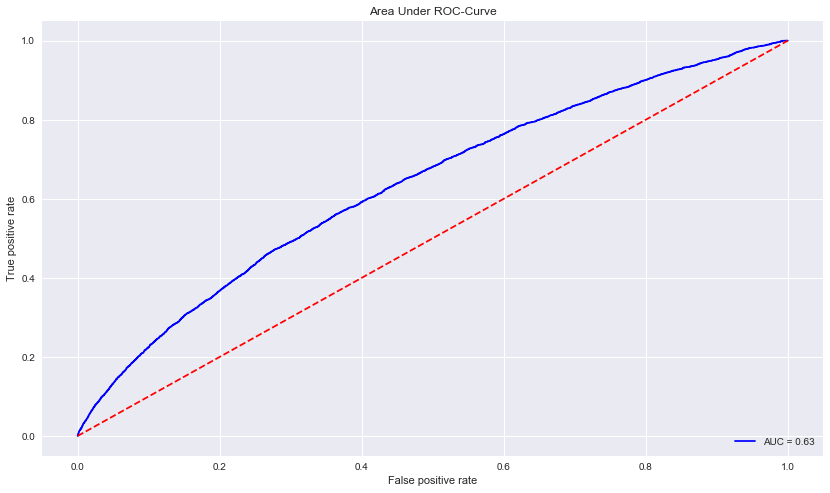

In [95]:
# Area Under ROC-Curve (Normalized gini = 2*AUC-1)
proba = lr.predict_proba(xvl)[:,1]
fpr,tpr, threshold = roc_curve(yvl,proba)
auc_val = auc(fpr,tpr)

plt.figure(figsize=(14,8))
plt.title('Area Under ROC-Curve')
plt.plot(fpr,tpr,'b',label = 'AUC = %0.2f' % auc_val)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

In [97]:
# Make prediction and create submission file
y_pred = pred_test_full/5
submit = pd.DataFrame({'id':testset['id'],'target':y_pred})
submit.to_csv('/Users/xinyaliu/Desktop/master report/submission_logistic_regu.csv',index=False) 

In [ ]:
# XGBoost (with Grid Search)
# Didn't run directly from ipython notebook, since it takes a long time to run out results
xg_cl = xgb.XGBClassifier(max_depth=4,learning_rate=0.1,n_estimators=500,objective='binary:logistic',
                          min_child_weight=1,scale_pos_weight=1)
param = {'max_depth':[4,7,8],
         'learning_rate':[0.01,0.03,0.1,0.3],
         'min_child_weight':[5,6],
         'reg_lambda':[0.5,1.3,1.7],
         'reg_alpha':[8,10],
         'gamma':[1,5,10],
         'scale_pos_weight':[1,2,3],
        'subsample':[0.7,0.8],
        'colsample_bytree':[0.7,0.8]
        }
clf = GridSearchCV(xg_cl,param,scoring='roc_auc',refit=True)

clf.fit(X,y)
print('Best roc_auc: {:.4}, with best params: {}'.format(clf.best_score_, clf.best_params_))

In [ ]:
def runXGB(xtrain,xvalid,ytrain,yvalid,xtest,eta=0.1,num_rounds=100,max_depth=4):
    params = {
        'objective':'binary:logistic',        
        'max_depth':max_depth,
        'learning_rate':eta,
        'eval_metric':'auc',
        'min_child_weight':6,
        'subsample':0.8,
        'colsample_bytree':0.8,
        'seed':45,
        'reg_lambda':1.3,
        'reg_alpha':8,
        'gamma':10,
        'scale_pos_weight':1.6
        #'n_thread':-1
    }
    
    dtrain = xgb.DMatrix(xtrain,label=ytrain)
    dvalid = xgb.DMatrix(xvalid,label=yvalid)
    dtest = xgb.DMatrix(xtest)
    watchlist = [(dtrain,'train'),(dvalid,'test')]
    
    model = xgb.train(params,dtrain,num_rounds,watchlist,early_stopping_rounds=50,verbose_eval=50)
    pred = model.predict(dvalid,ntree_limit=model.best_ntree_limit)
    pred_test = model.predict(dtest,ntree_limit=model.best_ntree_limit)
    return pred_test,model

In [44]:
cv=2

In [ ]:
kf = StratifiedKFold(n_splits=cv,random_state=45)
pred_test_full =0
cv_score = []
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    pred_test,xg_model = runXGB(xtr,xvl,ytr,yvl,x_test,num_rounds=100,eta=0.1)    
    pred_test_full += pred_test
    cv_score.append(xg_model.best_score)
    i+=1

In [ ]:
print(cv_score)
print('Mean cv_score',np.mean(cv_score))

In [ ]:
pred_xgb = pred_test_full/cv

In [ ]:
fig,ax = plt.subplots(figsize=(14,10))
xgb.plot_importance(xg_model,ax=ax,height=0.8,color='r')
plt.show()

In [ ]:
y_pred = pred_xgb
submit = pd.DataFrame({'id':test['id'],'target':y_pred})
submit.to_csv('/Users/xinyaliu/Desktop/master report/submission_xgb.csv',index=False)